<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Major Project 1

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> MAJOR PROJECT - CREDIT RISK ANALYTICS (BONDORA BANK)



<a id="clean1"></a>
<h3>   
      <font color = grenn >
            <span style='font-family:Georgia'>
            Importing Libraries
            </span>   
        </font>    
</h3>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools
import matplotlib.ticker as ticker
from sklearn.impute import SimpleImputer

<a id="clean1"></a>
<h3>   
      <font color = grenn >
            <span style='font-family:Georgia'>
             Loadind data and Checking basics of data
            </span>   
        </font>    
</h3>


In [2]:
# Load the datasets with specified encoding
applicationDF = pd.read_csv('D:/Evoustra/application_data.csv', encoding='utf-8')
columns_description = pd.read_csv('D:/Evoustra/columns_description.csv', encoding='ISO-8859-1')
previousDF = pd.read_csv('D:/Evoustra/previous_application.csv', encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Evoustra/application_data.csv'

In [3]:
# Display the first few rows of each dataset
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Display the first few rows of the application_data DataFrame
display(applicationDF.head())

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
num_columns_application = applicationDF.shape[1]
print(f'Number of columns in applicationDF: {num_columns_application}')

Number of columns in applicationDF: 122


In [5]:
display("previous_application ")
display(previousDF.head())

'previous_application '

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [6]:
num_columns_previous_application = previousDF.shape[1]
print(f'Number of columns in previous_application: {num_columns_previous_application}')

Number of columns in previous_application: 37


In [7]:
display("columns_description")
columns_description=columns_description
display(columns_description)

'columns_description'

Unnamed: 0                     Table                           Row  \
0             1          application_data                    SK_ID_CURR   
1             2          application_data                        TARGET   
2             5          application_data            NAME_CONTRACT_TYPE   
3             6          application_data                   CODE_GENDER   
4             7          application_data                  FLAG_OWN_CAR   
5             8          application_data               FLAG_OWN_REALTY   
6             9          application_data                  CNT_CHILDREN   
7            10          application_data              AMT_INCOME_TOTAL   
8            11          application_data                    AMT_CREDIT   
9            12          application_data                   AMT_ANNUITY   
10           13          application_data               AMT_GOODS_PRICE   
11           14          application_data               NAME_TYPE_SUITE   
12           15          application_data              NAME_INCOME_TYPE   
13           16          application_data           NAME_EDUCATION_TYPE   
14           17          application_data            NAME_FAMILY_STATUS   
15           18          application_data             NAME_HOUSING_TYPE   
16           19          application_data    REGION_POPULATION_RELATIVE   
17           20          application_data                    DAYS_BIRTH   
18           21          application_data                 DAYS_EMPLOYED   
19           22          application_data             DAYS_REGISTRATION   
20           23          application_data               DAYS_ID_PUBLISH   
21           24          application_data                   OWN_CAR_AGE   
22           25          application_data                    FLAG_MOBIL   
23           26          application_data                FLAG_EMP_PHONE   
24           27          application_data               FLAG_WORK_PHONE   
25           28          application_data              FLAG_CONT_MOBILE   
26           29          application_data                    FLAG_PHONE   
27           30          application_data                    FLAG_EMAIL   
28           31          application_data               OCCUPATION_TYPE   
29           32          application_data               CNT_FAM_MEMBERS   
30           33          application_data          REGION_RATING_CLIENT   
31           34          application_data   REGION_RATING_CLIENT_W_CITY   
32           35          application_data    WEEKDAY_APPR_PROCESS_START   
33           36          application_data       HOUR_APPR_PROCESS_START   
34           37          application_data    REG_REGION_NOT_LIVE_REGION   
35           38          application_data    REG_REGION_NOT_WORK_REGION   
36           39          application_data   LIVE_REGION_NOT_WORK_REGION   
37           40          application_data        REG_CITY_NOT_LIVE_CITY   
38           41          application_data        REG_CITY_NOT_WORK_CITY   
39           42          application_data       LIVE_CITY_NOT_WORK_CITY   
40           43          application_data             ORGANIZATION_TYPE   
41           44          application_data                  EXT_SOURCE_1   
42           45          application_data                  EXT_SOURCE_2   
43           46          application_data                  EXT_SOURCE_3   
44           47          application_data                APARTMENTS_AVG   
45           48          application_data              BASEMENTAREA_AVG   
46           49          application_data   YEARS_BEGINEXPLUATATION_AVG   
47           50          application_data               YEARS_BUILD_AVG   
48           51          application_data                COMMONAREA_AVG   
49           52          application_data                 ELEVATORS_AVG   
50           53          application_data                 ENTRANCES_AVG   
51           54          application_data                 FLOORSMAX_AVG   
52           55          appli

In [8]:
# Check the data types of each column
applicationDF.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [9]:
columns_description.dtypes

Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object

In [10]:
previousDF.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

<a id="clean1"></a>
<h3>   
      <font color = grenn >
            <span style='font-family:Georgia'>
             Checking for missing values in application_data
            </span>   
        </font>    
</h3>



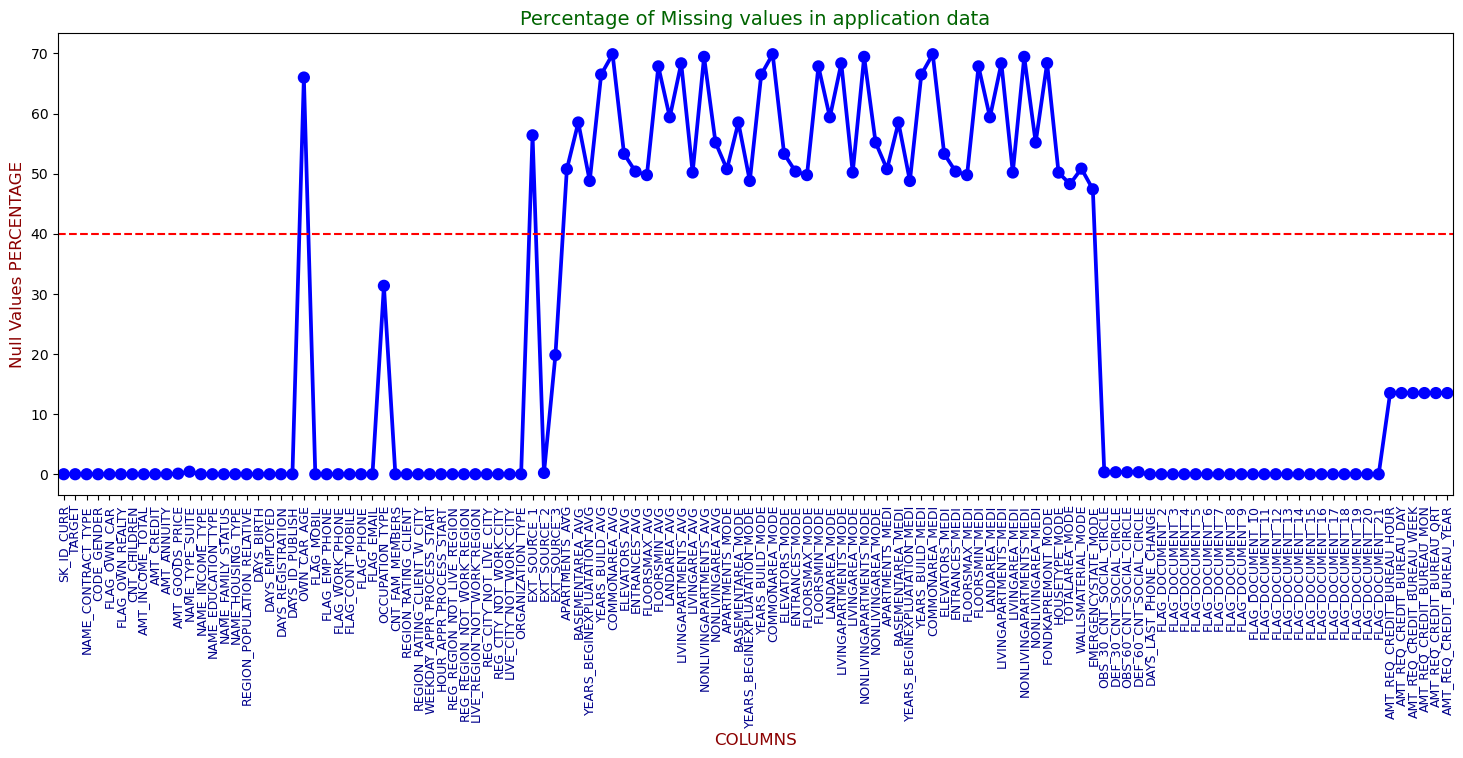

In [11]:
# Create a DataFrame with missing value percentages
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =9,color='darkblue')
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data",fontsize=14, color='darkgreen')
plt.ylabel("Null Values PERCENTAGE",fontsize=12, color='darkred')
plt.xlabel("COLUMNS",fontsize=12, color='darkred')
plt.show()


  <div class="alert alert-block alert-info">
        <span style='font-family:Georgia'>
            <b>Insight: </b><br>From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values
        </span>    
    </div>

In [12]:
# Filter columns with 40% or more missing values
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application

Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [13]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = grenn >
            <span style='font-family:Georgia'>
             Checking for missing values in previous_application
            </span>   
        </font>    
</h3>



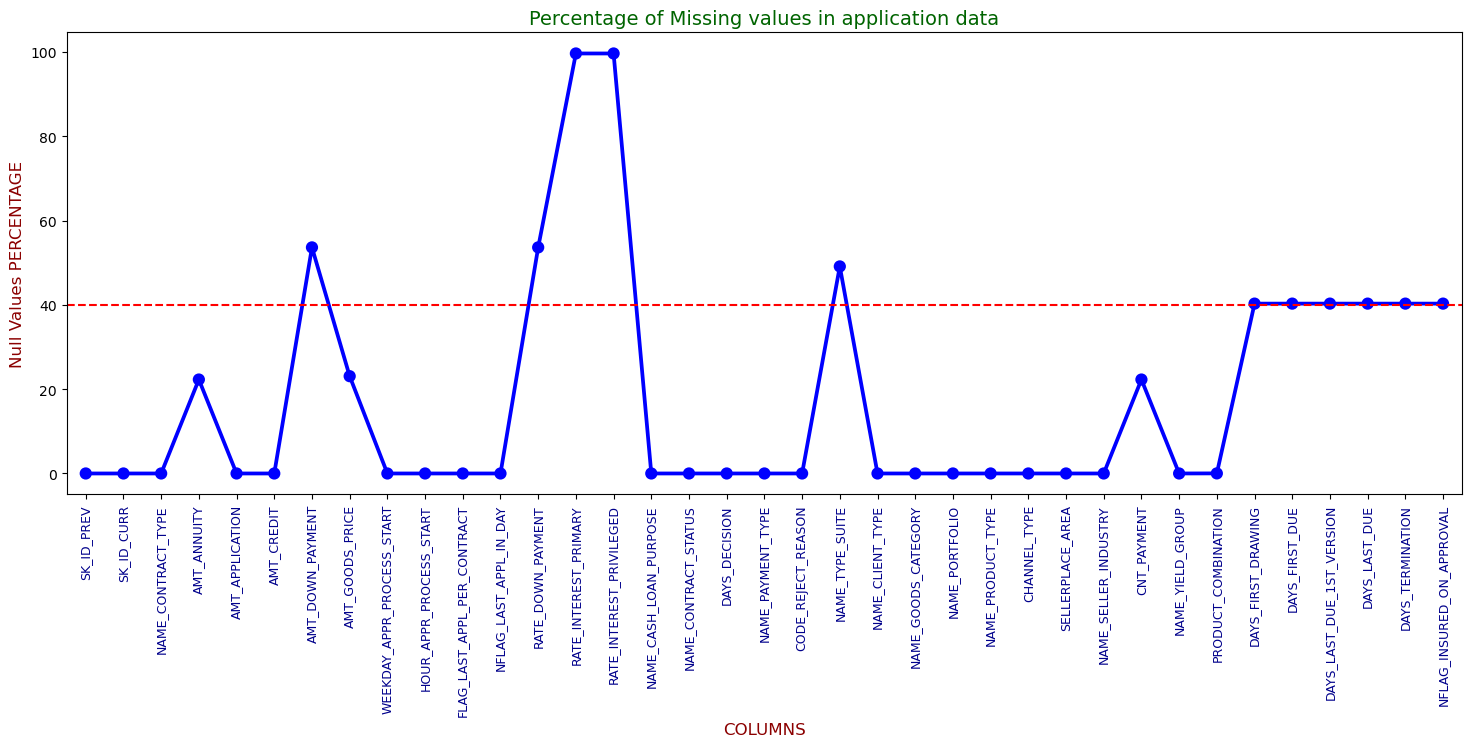

In [14]:
# Create a DataFrame with missing value percentages
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_previousDF,color='blue')
plt.xticks(rotation =90,fontsize =9,color='darkblue')
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data",fontsize=14, color='darkgreen')
plt.ylabel("Null Values PERCENTAGE",fontsize=12, color='darkred')
plt.xlabel("COLUMNS",fontsize=12, color='darkred')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values
    </span>    
</div>

In [15]:
# Filter columns with 40% or more missing values
# more than or equal to 40% empty rows columns
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous

Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [16]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_previous)

11

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 11 columns are there which have more than 40% null values. These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = grenn >
            <span style='font-family:Georgia'>
            Analyze & Delete Unnecessary Columns in application_data
            </span>   
        </font>    
</h3>

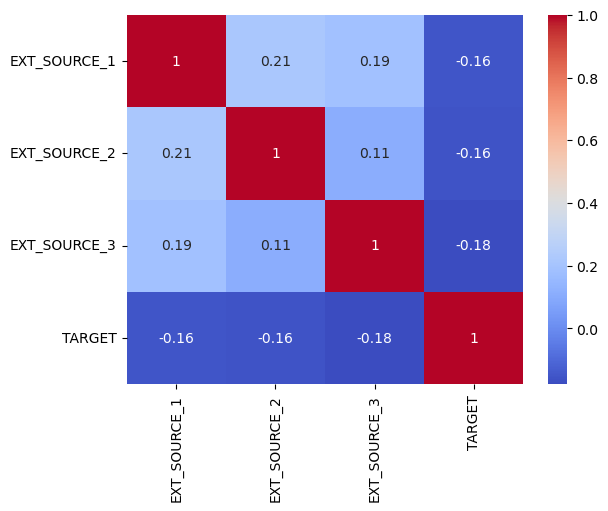

In [17]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column

Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="coolwarm")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values
    </span>    
</div>

In [18]:
    # create a list of columns that needs to be dropped including the columns with >40% null values
    
    Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
    # as EXT_SOURCE_1 column is already included in nullcol_40_application 
    len(Unwanted_application)

51

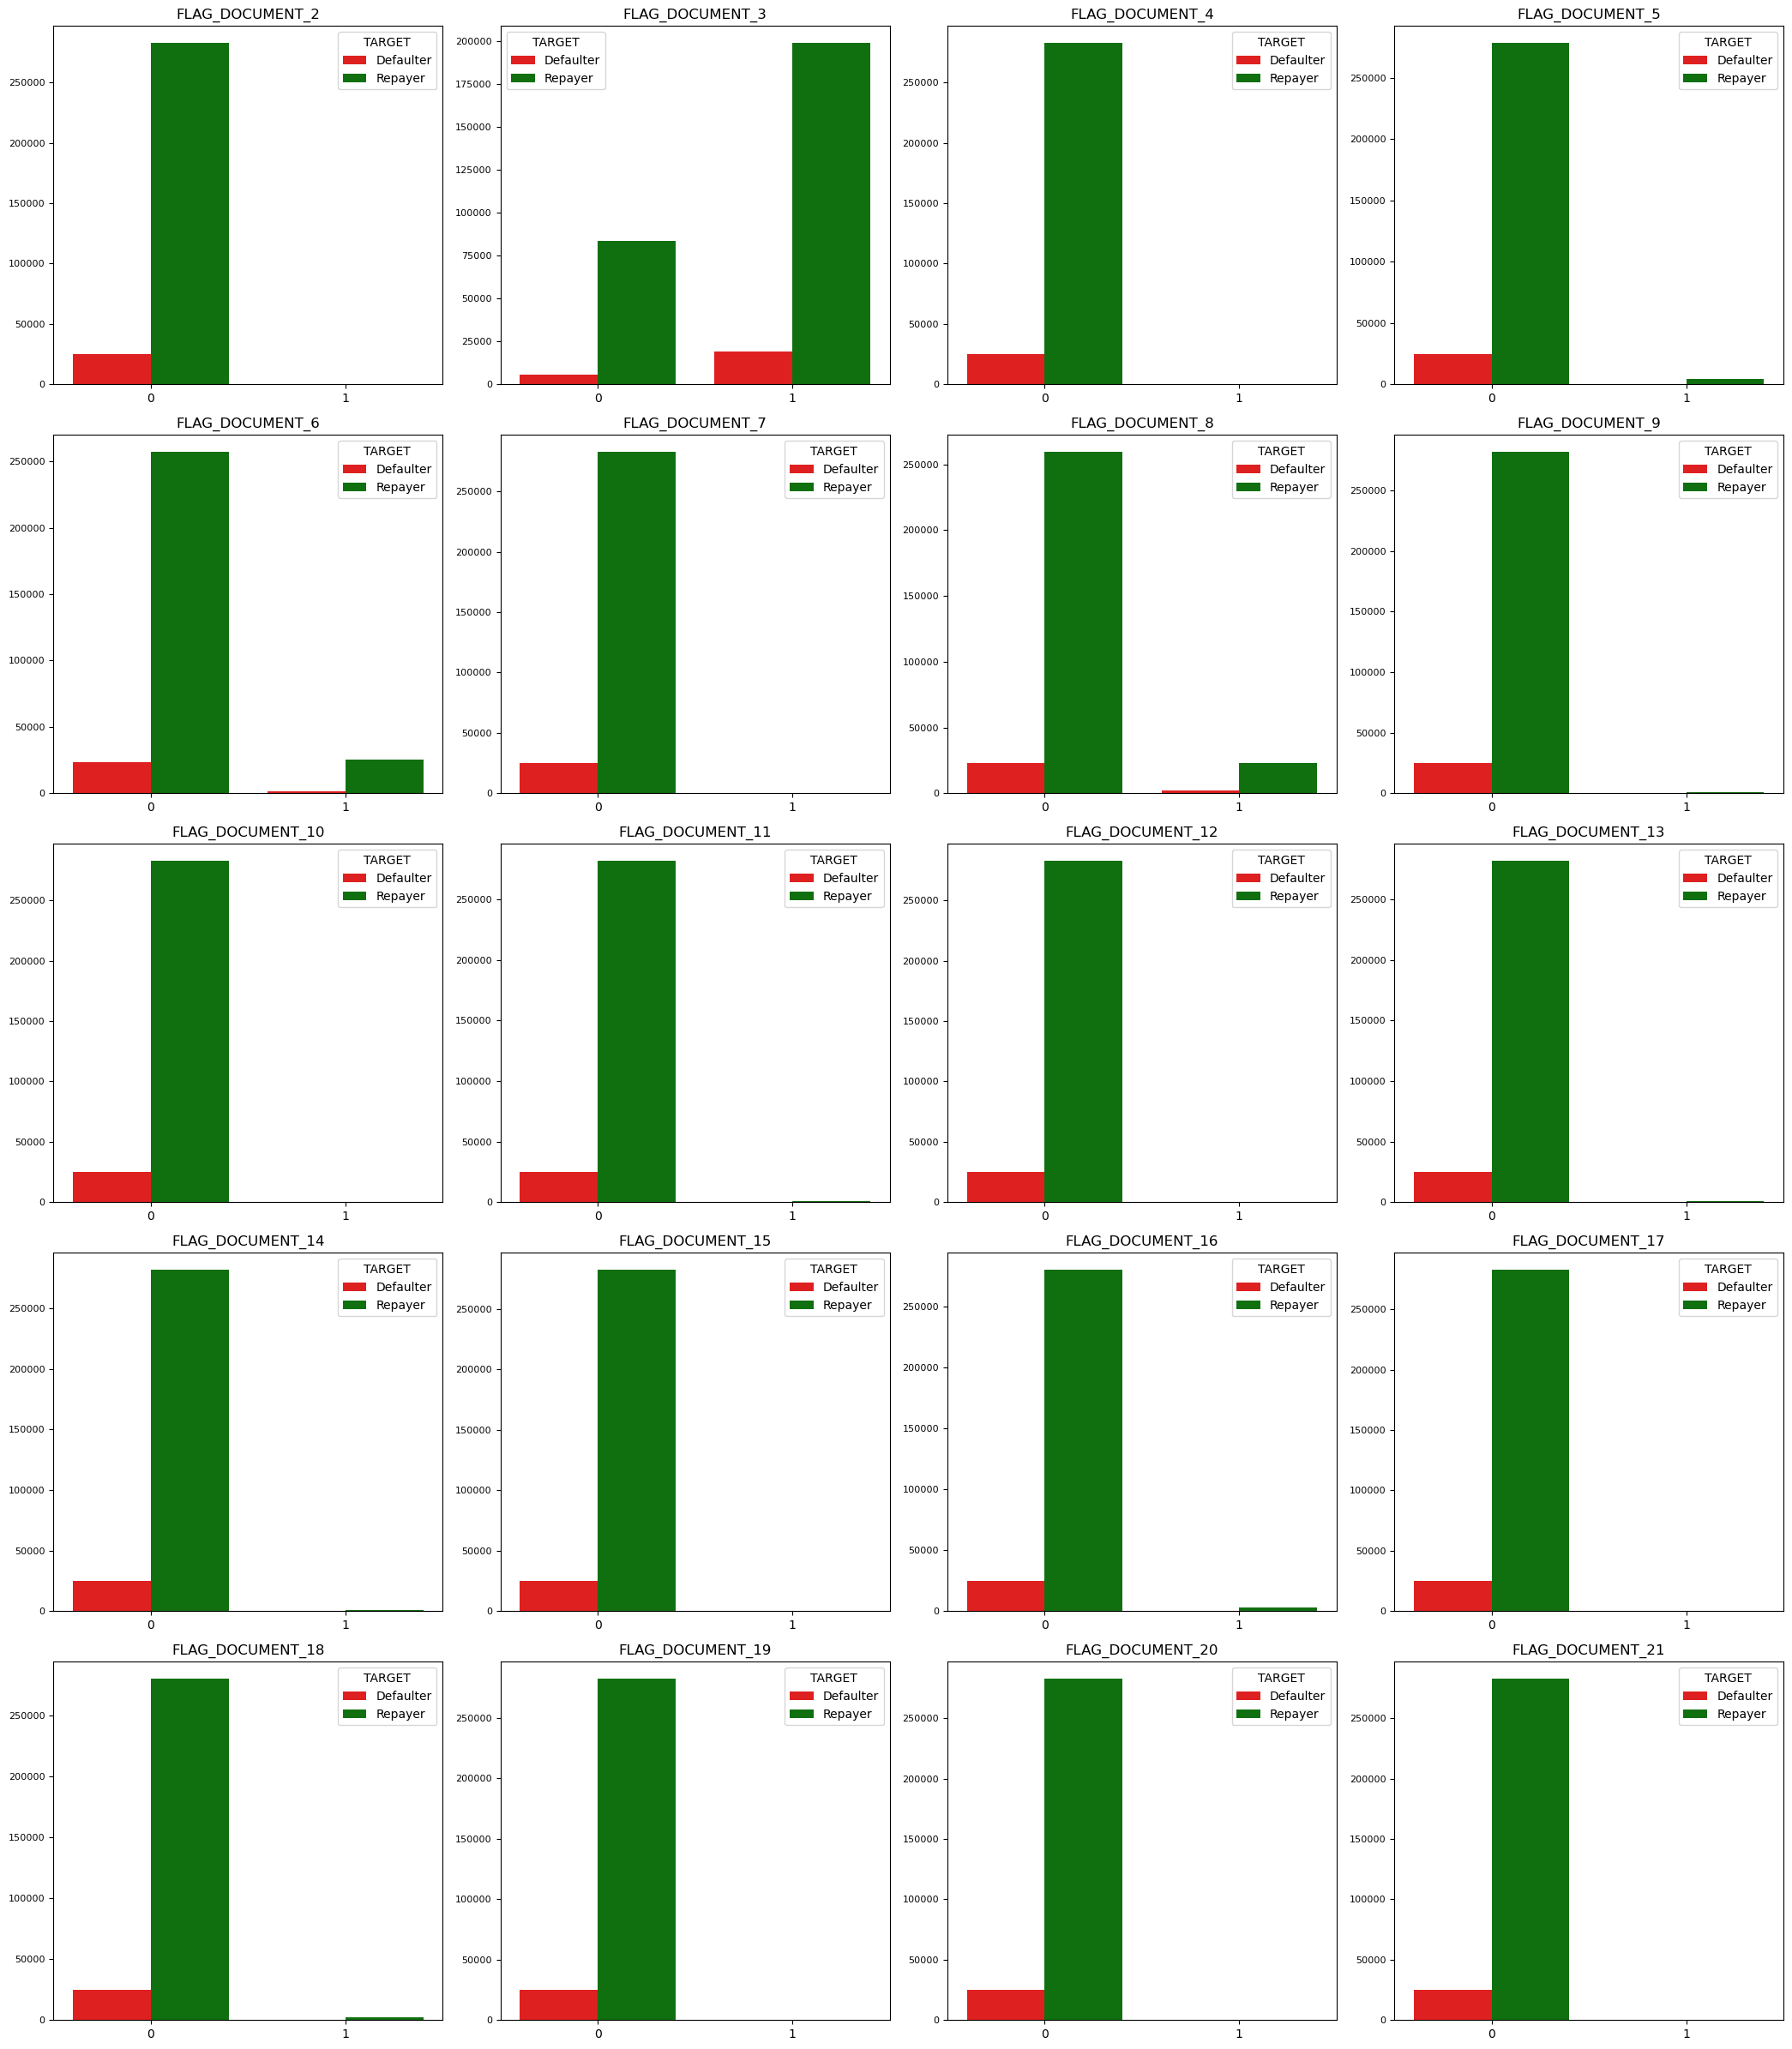

In [19]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status

col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)
# Replace TARGET values
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

# Set up the plot
fig = plt.figure(figsize=(21, 24))

# Iterate through the document columns
for i, j in itertools.zip_longest(col_Doc, range(len(col_Doc))):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(x=df_flag[i], hue=df_flag["TARGET"], palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.
    </span>    
</div>

In [20]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

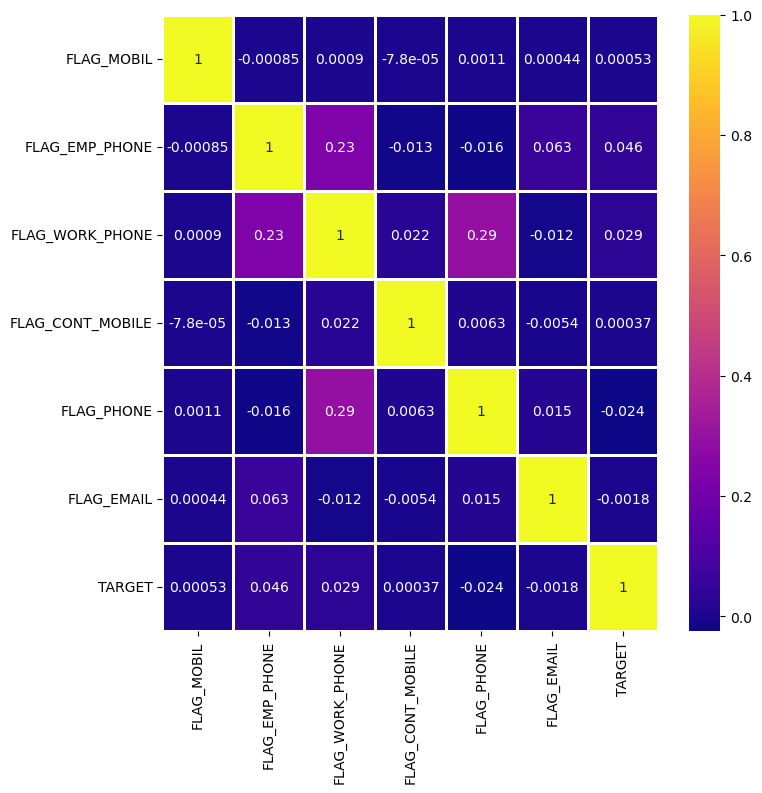

In [21]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="plasma",
            linewidth=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted
    </span>    
</div>

In [22]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        Total 76 columns can be deleted from applicationDF
    </span>    
</div>

In [23]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [24]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [25]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>After deleting unnecessary columns, there are 46 columns remaining in applicationDF
    </span>    
</div>

<a id="clean2"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
            Analyze & Delete Unnecessary Columns in previousDF
            </span>   
        </font>    
</h3>

In [26]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [27]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [28]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>
        Total 15 columns can be deleted from previousDF
    </span>    
</div>

In [29]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(1670214, 22)

In [30]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        After deleting unnecessary columns, there are 22 columns remaining in applicationDF
    </span>    
</div>

<a id="stdval"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Standardize Values in application data
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b> 
        <ul>
            <li>Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.</li>
            <li>Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns</li>
            <li>Categorize the amount variables into bins</li>
            <li>Convert region rating column and few other columns to categorical</li>
        </ul>       
    </span>    
</div>

In [31]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col] = abs(applicationDF[col])

In [32]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)


In [33]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More than 50% loan applicants  have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K
    </span>    
</div>

In [34]:
# Creating bins for Credit amount
applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slots)

In [35]:
#checking the binning of data and % of data in each category

applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More Than 16% loan applicants have taken loan which amounts to more than 1M.
    </span>    
</div>

In [36]:
# Creating bins for Age

applicationDF['AGE'] = applicationDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)

In [37]:
#checking the binning of data and % of data in each category

applicationDF['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.
    </span>    
</div>

In [38]:
# Creating bins for Employement Time

applicationDF['YEARS_EMPLOYED'] = applicationDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [39]:
#checking the binning of data and % of data in each category

applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience
    </span>    
</div>

In [40]:
#Checking the number of unique values each column possess to identify categorical columns

applicationDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

<a id="dconv"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Data Type Conversion
            </span>   
        </font>    
</h3>

In [41]:
# inspecting the column types if they are in correct data type using the above result.

applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.
    </span>    
</div>

In [44]:
#Conversion of Object and Numerical columns to Categorical Columns

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [45]:
# inspecting the column types if the above conversion is reflected
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

<h4>   
      <font color = green >
            <span style='font-family:Georgia'>
             Standardize Values for previousDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for previousDF: </b> 
        <ul>
            <li>Convert DAYS_DECISION from negative to positive values and create categorical bins columns.</li>
            <li>Convert loan purpose and few other columns to categorical.</li>
        </ul>
    </span>    
</div>

In [46]:
#Checking the number of unique values each column possess to identify categorical columns
previousDF.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [47]:
# inspecting the column types if the above conversion is reflected
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [48]:
#Converting negative days to positive days 

previousDF['DAYS_DECISION'] = abs(previousDF['DAYS_DECISION'])

In [49]:
#age group calculation e.g. 388 will be grouped as 300-400

previousDF['DAYS_DECISION_GROUP'] = (previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previousDF['DAYS_DECISION'] - (previousDF['DAYS_DECISION'] % 400)) + (previousDF['DAYS_DECISION'] % 400) + (400 - (previousDF['DAYS_DECISION'] % 400))).astype(str)


In [50]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision
    </span>    
</div>

In [57]:
#Converting Categorical columns from Object to categorical 

Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [52]:
# inspecting the column types after conversion

previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

<a id="impute"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Null Value Data Imputation
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b> 
        <ul>
            <li>To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.</li>
            <li>To impute null values in categorical variables which has higher null percentage, a new category is created.</li>
            <li>To impute null values in numerical variables which has lower null percentage, median() is used as </li>
            <ul>
                <li>There are no outliers in the columns</li>
                <li>Mean returned decimal values and median returned whole numbers and the columns were number of requests</li>
            </ul>        
        </ul>
    </span>    
</div>

In [56]:
# checking the null value % of each column in applicationDF dataframe

round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

<p>
    <span style='font-family:Georgia'>
           Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:
    </span>
</p>

    

In [58]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [59]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

<p>
    <span style='font-family:Georgia'>
           Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:
    </span>
</p>


In [60]:
applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

<p>
    <span style='font-family:Georgia'>
           Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:
    </span>
</p>

In [62]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

<p>
    <span style='font-family:Georgia'>
           Impute with median as mean has decimals and this is number of requests
    </span>
</p>

In [63]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace = True)

In [64]:
# checking the null value % of each column in previousDF dataframe

round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.
    </span>    
</div>

> <h4>   
      <font color = green >
            <span style='font-family:Georgia'>
            Imputing Null Values in previousDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for previousDF: </b> 
        <ul>
            <li>To impute null values in numerical column, we analysed the loan status and assigned values.</li>
            <li>To impute null values in continuous variables, we plotted the distribution of the columns and used </li>
            <ul>
                <li>median if the distribution is skewed</li>
                <li>mode if the distribution pattern is preserved.</li>
            </ul>        
        </ul>
    </span>    
</div>

In [65]:
# checking the null value % of each column in previousDF dataframe

round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

<p>
    <span style='font-family:Georgia'>
           Impute AMT_ANNUITY with median as the distribution is greatly skewed:
    </span>
</p>

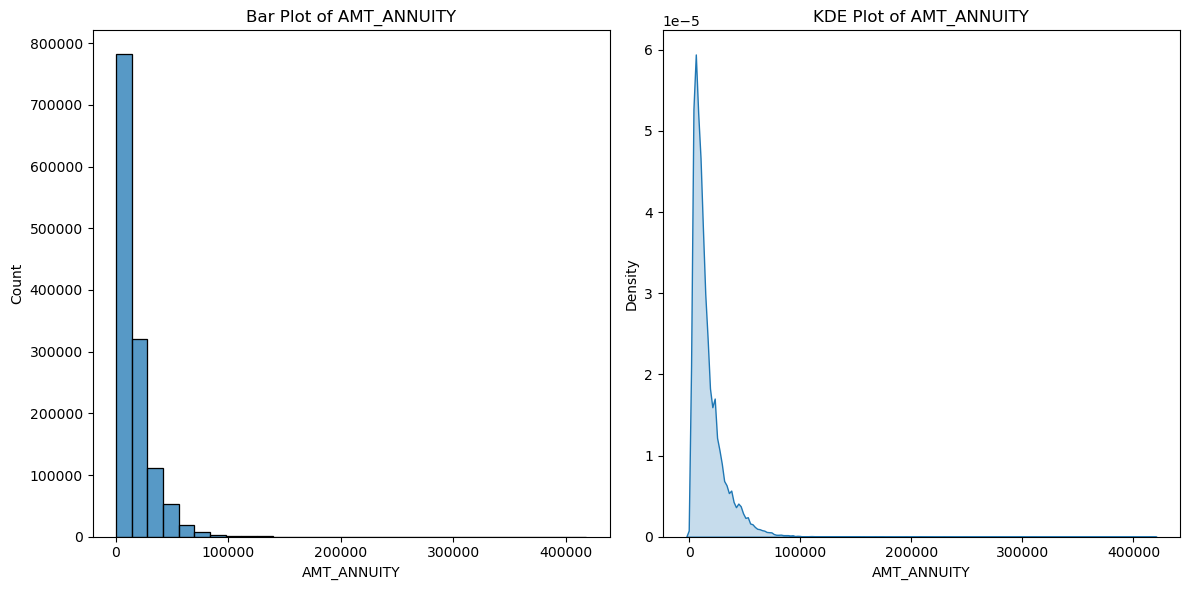

In [66]:
# Set up the figure
plt.figure(figsize=(12,6))

# Plot the bar plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(previousDF['AMT_ANNUITY'], bins=30, kde=False)
plt.title('Bar Plot of AMT_ANNUITY')

# Plot the KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.kdeplot(previousDF['AMT_ANNUITY'], shade=True)
plt.title('KDE Plot of AMT_ANNUITY')

# Show the plots
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.
    </span>    
</div>

In [67]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

<p>
    <span style='font-family:Georgia'>
           Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:
    </span>
</p>

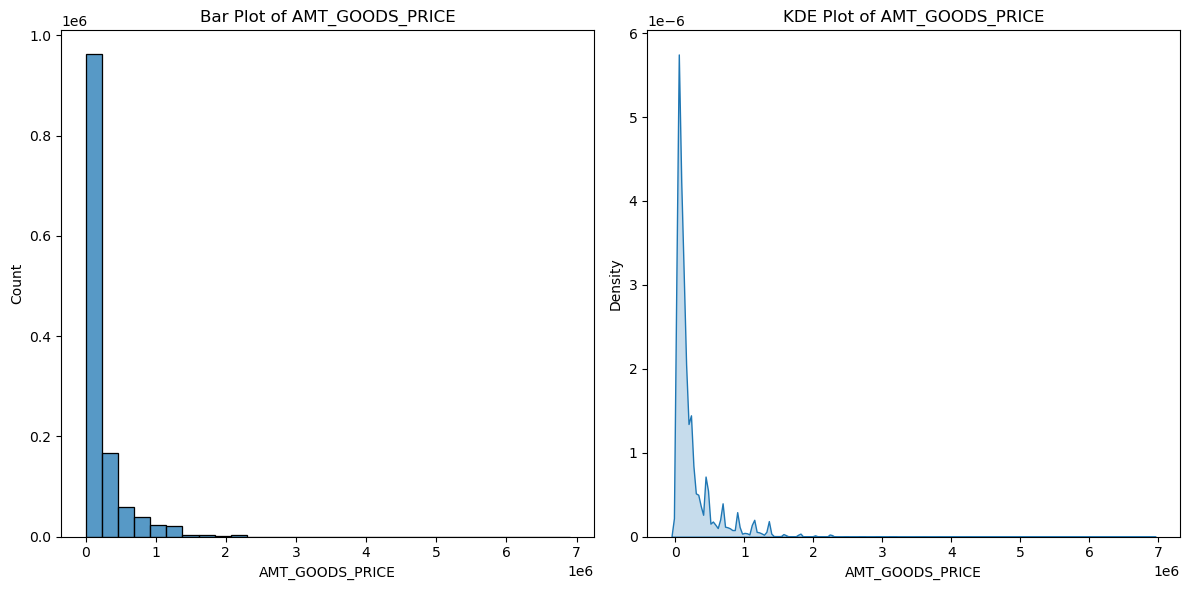

In [69]:
# Filter out null values
filtered_data = previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]

# Set up the figure
plt.figure(figsize=(12,6))

# Plot the bar plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(filtered_data, bins=30, kde=False)
plt.title('Bar Plot of AMT_GOODS_PRICE')

# Plot the KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.kdeplot(filtered_data, shade=True)
plt.title('KDE Plot of AMT_GOODS_PRICE')

# Show the plots
plt.tight_layout()
plt.show()

<p>
    <span style='font-family:Georgia'>
           There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.
    </span>
</p>

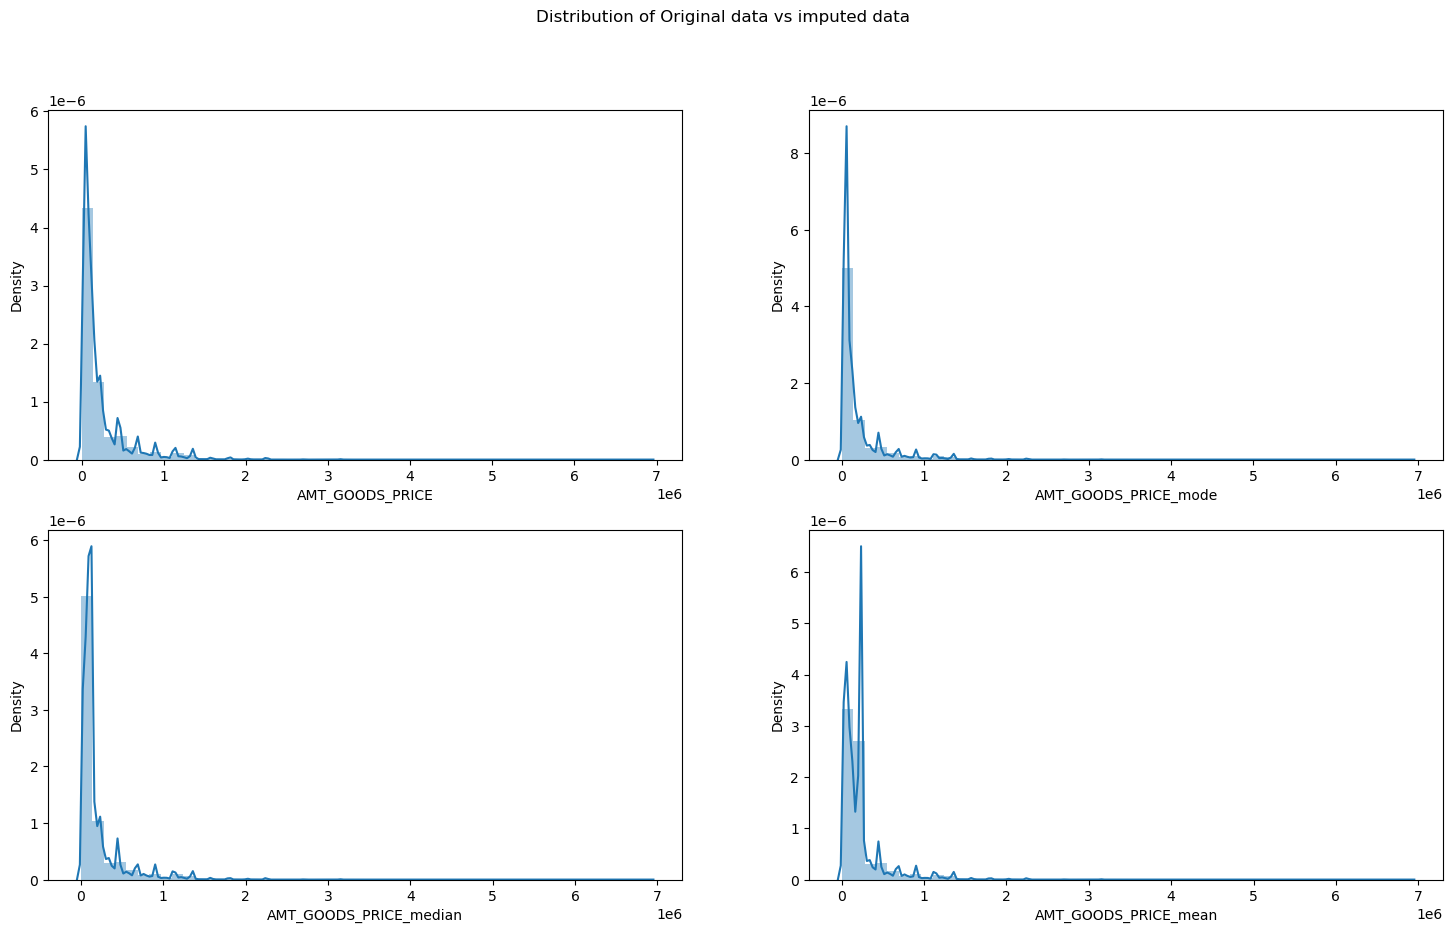

In [70]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The original distribution is closer with the distribution of data imputed with mode in this case
    </span>    
</div>

In [71]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

<p>
    <span style='font-family:Georgia'>
           Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:
    </span>
</p>

In [73]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [74]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [75]:
# checking the null value % of each column in previousDF dataframe

round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.
    </span>    
</div>

<a id="outlier"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Identifying the outliers
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Finding outlier information in applicationDF
    </span>
</p>

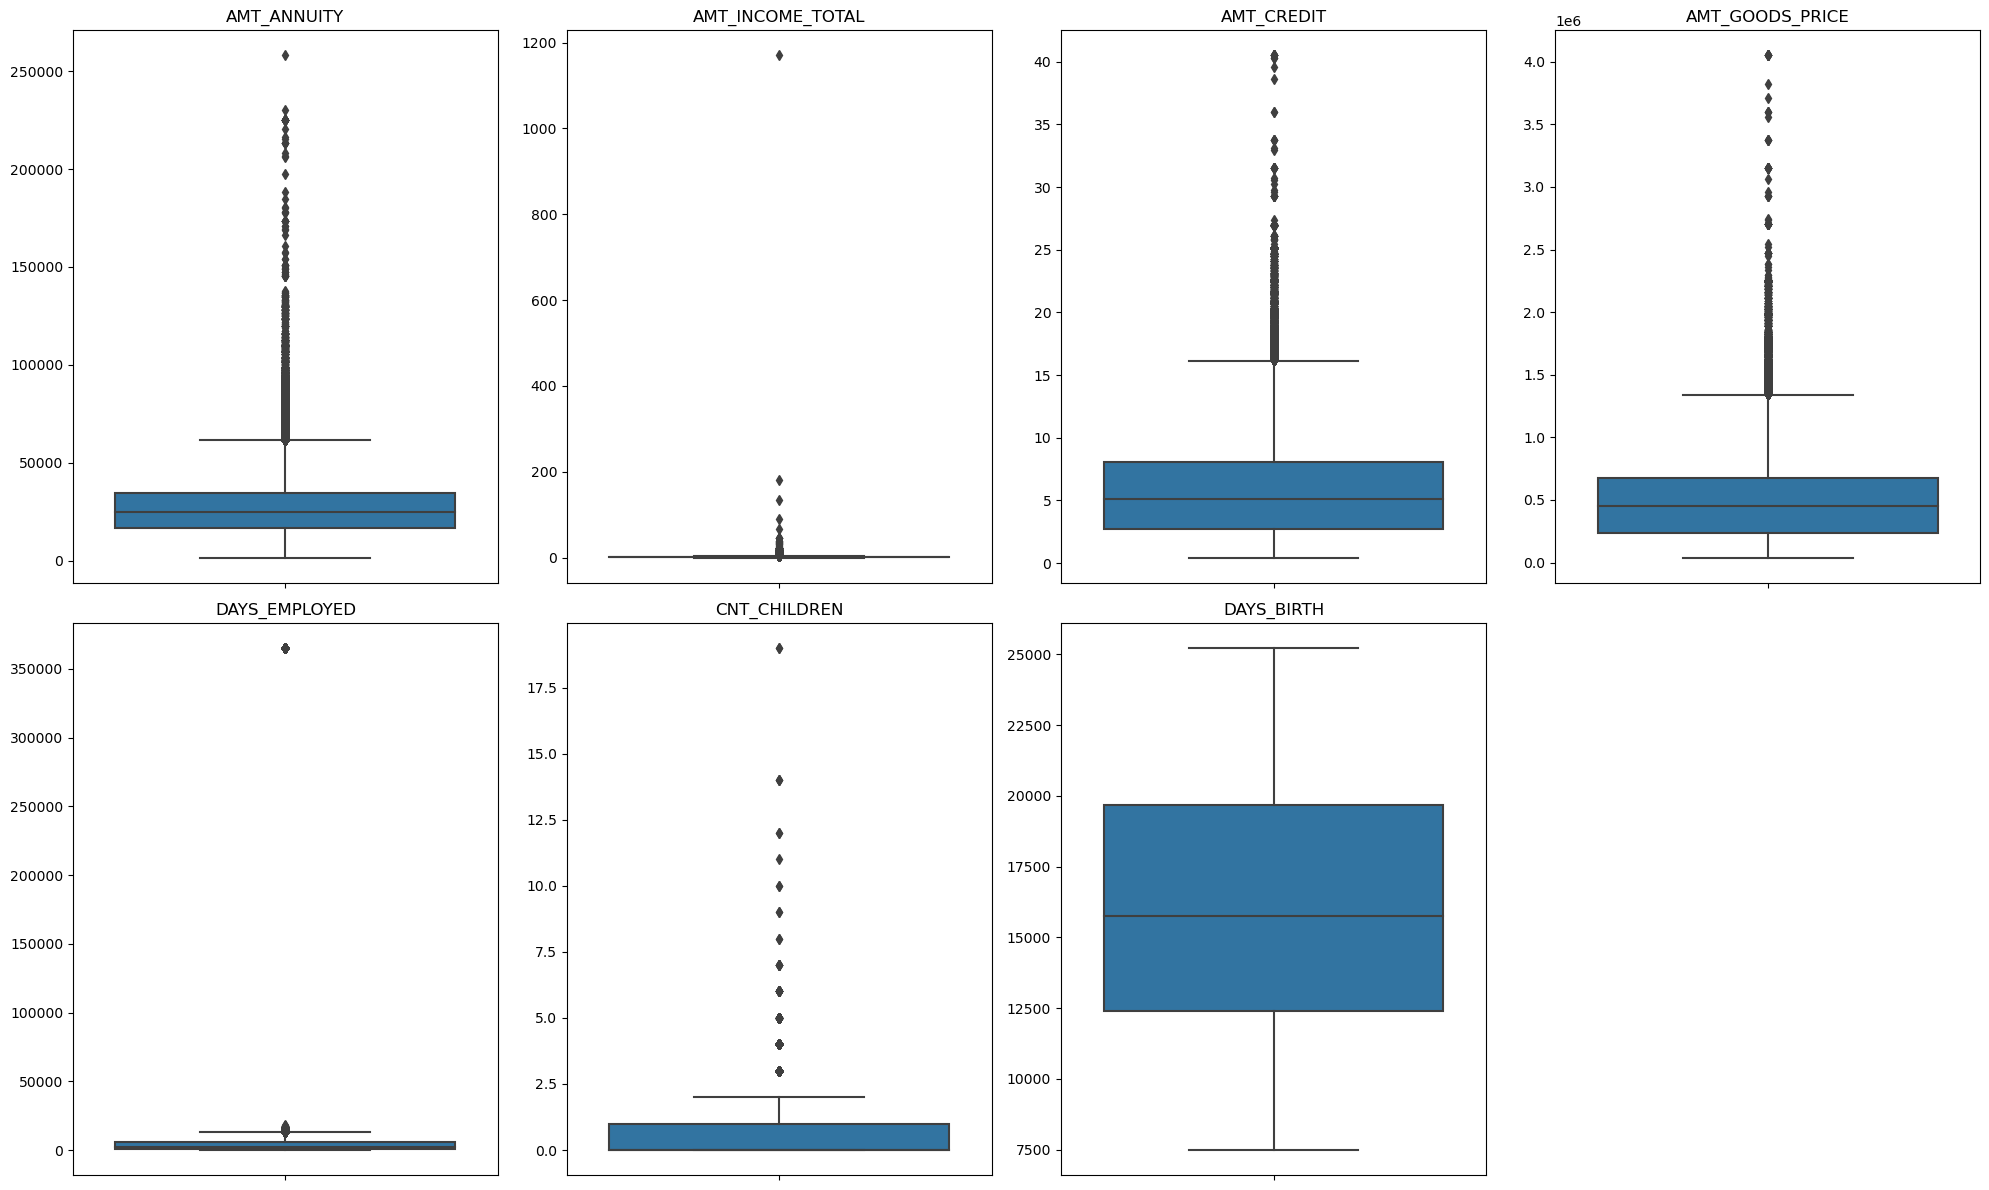

In [79]:
# Set up the figure with a larger size
plt.figure(figsize=(20,12))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']

# Combine the two lists for easier plotting
columns = app_outlier_col_1 + app_outlier_col_2

# Iterate through each column and create a boxplot
for i, col in enumerate(columns):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
    sns.boxplot(y=applicationDF[col])
    plt.title(col)
    plt.ylabel("")  # Remove the y-axis label for cleaner look

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>It can be seen that in current application data
        <ol>
            <li>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.</li>
            <li>AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.</li>
            <li>DAYS_BIRTH has no outliers which means the data available is reliable.</li>
            <li>DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

In [80]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000     307511.000000  307511.000000     3.072330e+05   
mean    27108.573909          1.687979       5.990260     5.383962e+05   
std     14493.737315          2.371231       4.024908     3.694465e+05   
min      1615.500000          0.256500       0.450000     4.050000e+04   
25%     16524.000000          1.125000       2.700000     2.385000e+05   
50%     24903.000000          1.471500       5.135310     4.500000e+05   
75%     34596.000000          2.025000       8.086500     6.795000e+05   
max    258025.500000       1170.000000      40.500000     4.050000e+06   

          DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED  
count  307511.000000  307511.000000  307511.000000  
mean    16036.995067       0.417052   67724.742149  
std      4363.988632       0.722121  139443.751806  
min      7489.000000       0.000000       0.000000  
25%     12413.000000       0.000000     933.000000  
50%     15750.000000       0.000000    2219.000000  
75%     19682.000000       1.000000    5707.000000  
max     25229.000000      19.000000  365243.000000

<p>
    <span style='font-family:Georgia'>
           Finding outlier information in previousDF
    </span>
</p>

<Figure size 2200x800 with 0 Axes>

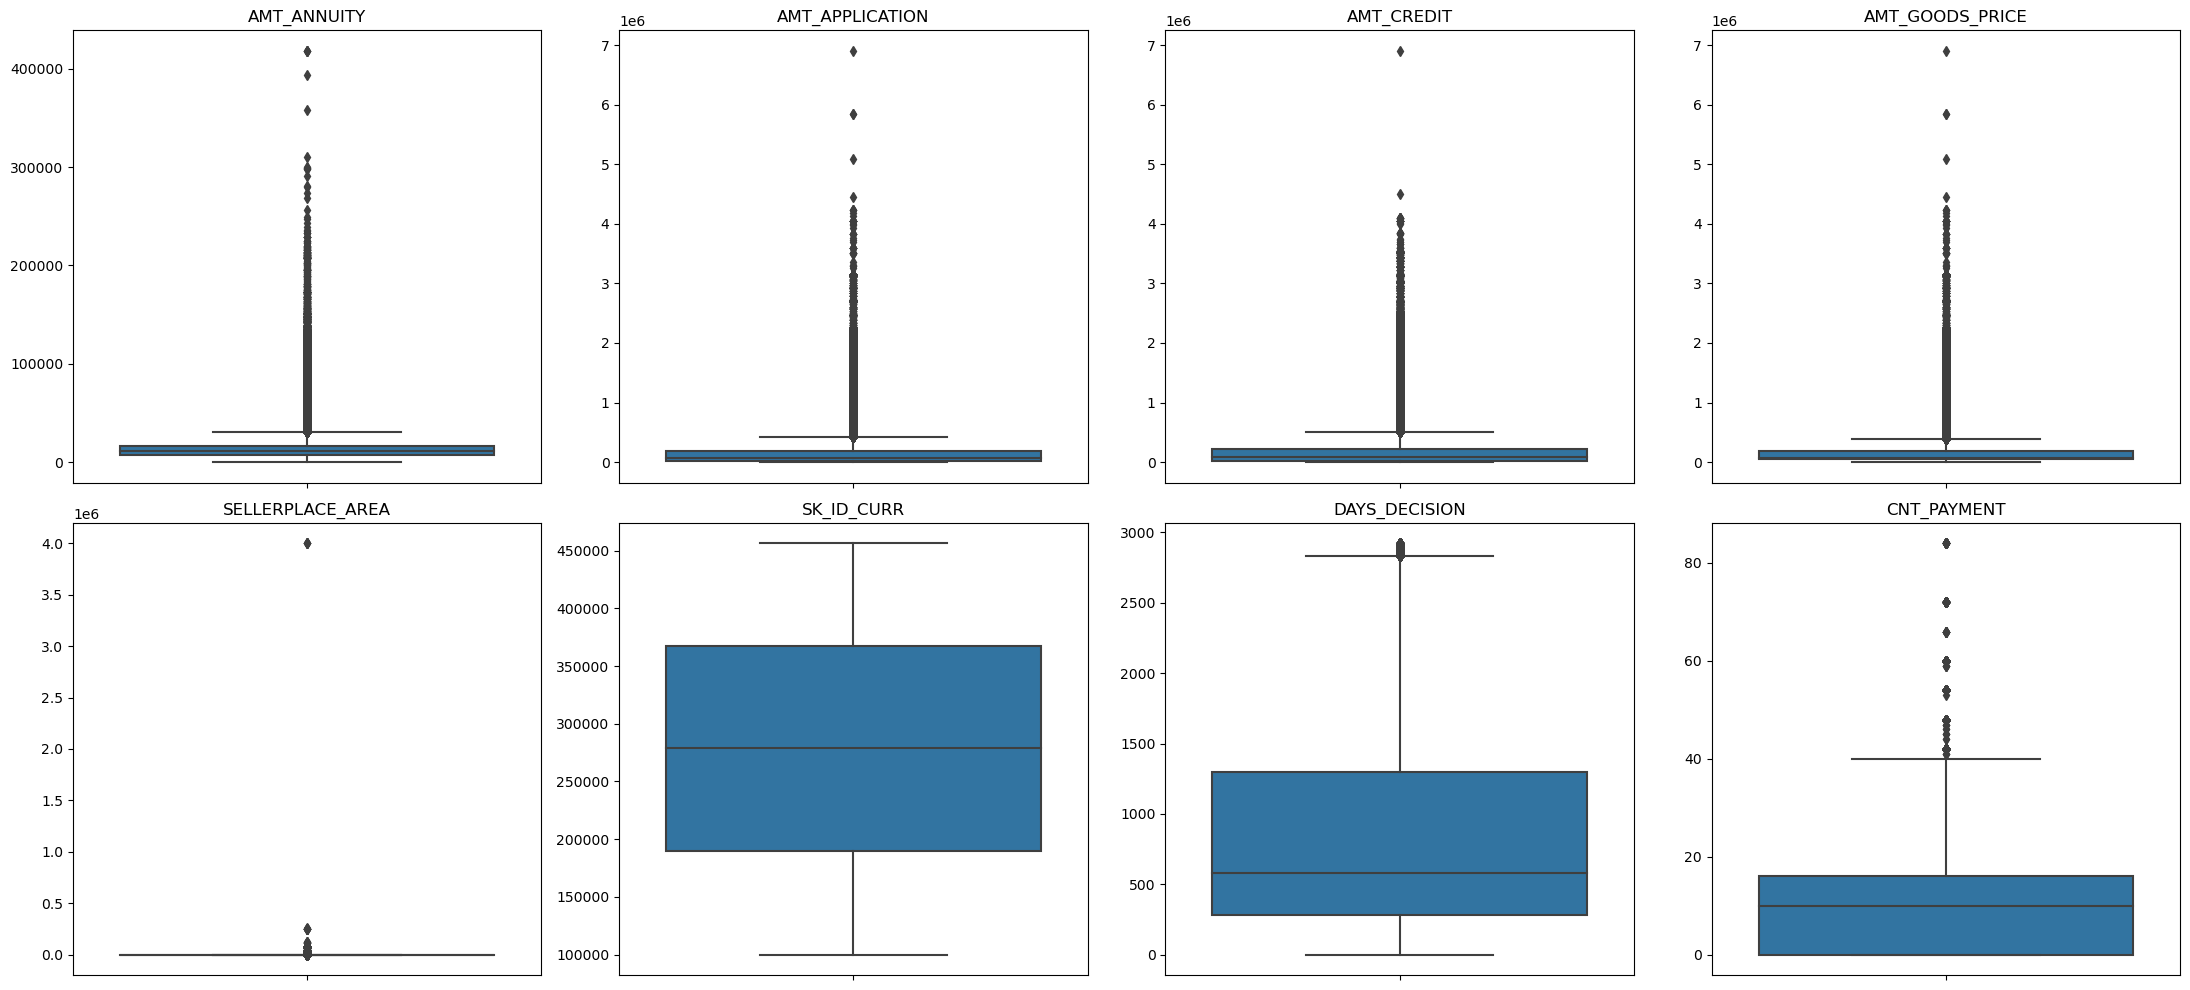

In [84]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
# Set up the figure with a larger size
plt.figure(figsize=(22, 10))

# Combine the two lists for easier plotting
columns = prev_outlier_col_1 + prev_outlier_col_2

# Iterate through each column and create a boxplot
for i, col in enumerate(columns):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
    sns.boxplot(y=previousDF[col])
    plt.title(col)
    plt.ylabel("")  # Remove y-axis label for cleaner look

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> It can be seen that in previous application data
        <ol>
            <li>AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.</li>
            <li>CNT_PAYMENT has few outlier values.</li>
            <li>SK_ID_CURR is an ID column and hence no outliers.</li>
            <li>DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

In [85]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION  
count      1.670214e+06  1.670214e+06   1.670214e+06  
mean       3.139511e+02  1.247621e+01   8.806797e+02  
std        7.127443e+03  1.447588e+01   7.790997e+02  
min       -1.000000e+00  0.000000e+00   1.000000e+00  
25%       -1.000000e+00  0.000000e+00   2.800000e+02  
50%        3.000000e+00  1.000000e+01   5.810000e+02  
75%        8.200000e+01  1.600000e+01   1.300000e+03  
max        4.000000e+06  8.400000e+01   2.922000e+03

<a id="analysis"></a>
<h2>   
      <font color = green >
            <span style='font-family:Georgia'>
            Data Analysis
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy:</b> 
        <p>The data analysis flow has been planned in following way :</p>
        <ul>
            <li>Imbalance in Data</li>
            <li>Categorical Data Analysis</li>
            <ul>
                <li>Categorical segmented Univariate Analysis</li>
                <li>Categorical Bi/Multivariate analysis</li>
            </ul>
            <li>Numeric Data Analysis</li>
            <ul>
                <li>Bi-furcation of databased based on TARGET data</li>
                <li>Correlation Matrix</li>
                <li>Numerical segmented Univariate Analysis</li>
                <li>Numerical Bi/Multivariate analysis</li>
            </ul> 
        </ul>
    </span>    
</div>

<a id="imbalance"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Imbalance Data Analysis
            </span>   
        </font>    
</h3>

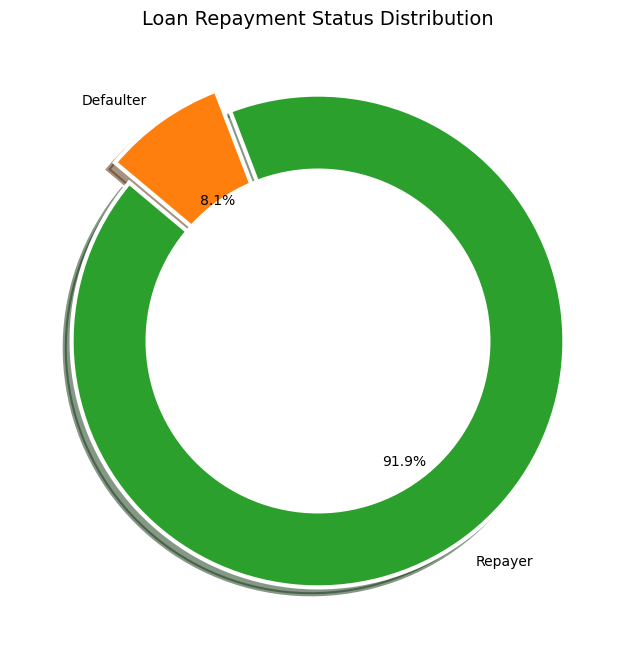

In [89]:
# Calculate the imbalance

Imbalance = applicationDF["TARGET"].value_counts()
labels = ['Repayer', 'Defaulter']  
colors = ['#2ca02c', '#ff7f0e'] 

# Set up the figure
plt.figure(figsize=(8, 8))

# Create the donut chart
plt.pie(Imbalance, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, 
        explode=(0, 0.1), shadow=True, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})

# Add a circle at the center to make it a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Customize the plot
plt.title("Loan Repayment Status Distribution", fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.gca().set_aspect('equal')

# Display the plot
plt.show()

In [91]:
# Ensure Imbalance is a DataFrame
Imbalance = applicationDF["TARGET"].value_counts().reset_index()
Imbalance.columns = ['Status', 'Count']  # Rename columns for clarity

# Access the counts
count_0 = Imbalance.iloc[0]["Count"]
count_1 = Imbalance.iloc[1]["Count"]

# Calculate the percentages
count_0_perc = round(count_0 / (count_0 + count_1) * 100, 2)
count_1_perc = round(count_1 / (count_0 + count_1) * 100, 2)

# Print the results
print('Ratios of imbalance in percentage with respect to Repayer and Defaulter data are: %.2f%% and %.2f%%' % (count_0_perc, count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter data is %.2f : 1 (approx)' % (count_0 / count_1))


Ratios of imbalance in percentage with respect to Repayer and Defaulter data are: 91.93% and 8.07%
Ratios of imbalance in relative with respect to Repayer and Defaulter data is 11.39 : 1 (approx)


<a id="oltfunc"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Plotting Functions
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Following are the common functions customized to perform uniform anaysis that is called for all plots:
    </span>
</p>

<a id="oltfunc"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
            Univariate Categorical Analysis
            </span>   
        </font>    
</h3>


In [118]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = applicationDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of Contracts': temp.values})

    # Calculate the percentage of defaulters per category
    cat_perc = applicationDF[[feature, 'TARGET']].groupby(feature, as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"] * 100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2 if horizontal_layout else 1, 
                                   nrows=1 if horizontal_layout else 2, 
                                   figsize=(12, 6 if horizontal_layout else 24))

    # 1. Count Plot
    sns.countplot(ax=ax1, x=feature, data=applicationDF, hue="TARGET", 
                  order=cat_perc[feature], palette=['lightgreen', 'orange'])
    ax1.set_title(f'{feature}', fontsize=10, fontweight='bold', color='blue')
    ax1.legend(['Repayer', 'Defaulter'])
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)", fontsize=10, fontweight='bold', color='blue')
    if label_rotation:
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    # 2. Percentage Plot
    sns.barplot(ax=ax2, x=feature, y='TARGET', data=cat_perc, 
                order=cat_perc[feature], palette='Set2')
    ax2.set_ylabel('Percent of Defaulters [%]', fontsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(f'{feature} Defaulter %', fontsize=15, fontweight='bold', color='blue')
    if label_rotation:
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    
    plt.tight_layout()
    plt.show()



<a id="oltfunc"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
           Bivariate Bar Plot
            </span>   
        </font>    
</h3>


In [148]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x, y, df, hue, figsize):
    plt.figure(figsize=figsize)
    # Use distinct colors for the bars
    sns.barplot(x=x, y=y, data=df, hue=hue, palette=['lightgreen', 'orange'])
    
    # Enhance readability with titles and labels
    plt.xlabel(x, fontsize=10, fontweight='bold', color='blue')
    plt.ylabel(y, fontsize=10, fontweight='bold', color='blue')
    plt.title(f'{y} by {x}', fontsize=15, fontweight='bold', color='blue')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90, ha='right')
    
    # Customize the legend to use specific labels
    plt.legend(title=hue, labels=['Defaulter', 'Repayer'], title_fontsize='13', fontsize='11', loc='upper right')
    
    plt.show()


<a id="oltfunc"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
          Bivariate Numerical Analysis (Scatter Plot)
            </span>   
        </font>    
</h3>


In [120]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x, y, data, hue, kind, palette, legend, figsize):
    plt.figure(figsize=figsize)
    sns.relplot(x=x, y=y, data=data, hue=hue, kind=kind, palette=palette, legend=legend)
    plt.legend(['Repayer', 'Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()


<a id="oltfunc"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
          Univariate Analysis on Merged Data
            </span>   
        </font>    
</h3>


In [121]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col, df, hue, palette, ylog, figsize):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col, data=df, hue=hue, palette=palette, 
                       order=df[col].value_counts().index)
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)", fontsize=10, fontweight='bold', color='blue')
    else:
        plt.ylabel("Count", fontsize=10, fontweight='bold', color='blue')
    plt.title(f'{col}', fontsize=15, fontweight='bold', color='blue')
    plt.legend(loc="upper right")
    plt.xticks(rotation=90, ha='right')
    plt.show()


<a id="oltfunc"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
          Point Plot on Merged Data
            </span>   
        </font>    
</h3>

In [189]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x, y):
    plt.figure(figsize=(8, 4))
    # Use seaborn's pointplot with a different color palette
    ax = sns.pointplot(x=x, y=y, hue="TARGET", data=loan_process_df, palette=['#1f77b4', '#ff7f0e'])
    
    # Set labels and title
    plt.xlabel(x, fontsize=10, fontweight='bold', color='blue')
    plt.ylabel(y, fontsize=10, fontweight='bold', color='blue')
    plt.title(f'{y} by {x}', fontsize=15, fontweight='bold', color='blue')
    
    # Manually set the legend to match the plot colors
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Repayer', 'Defaulter'], loc='best')
    
    plt.show()


</a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Categorical Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = orange >
            <span style='font-family:Georgia'>
             Segmented Univariate Analysis
            </span>   
        </font>    
</h4>

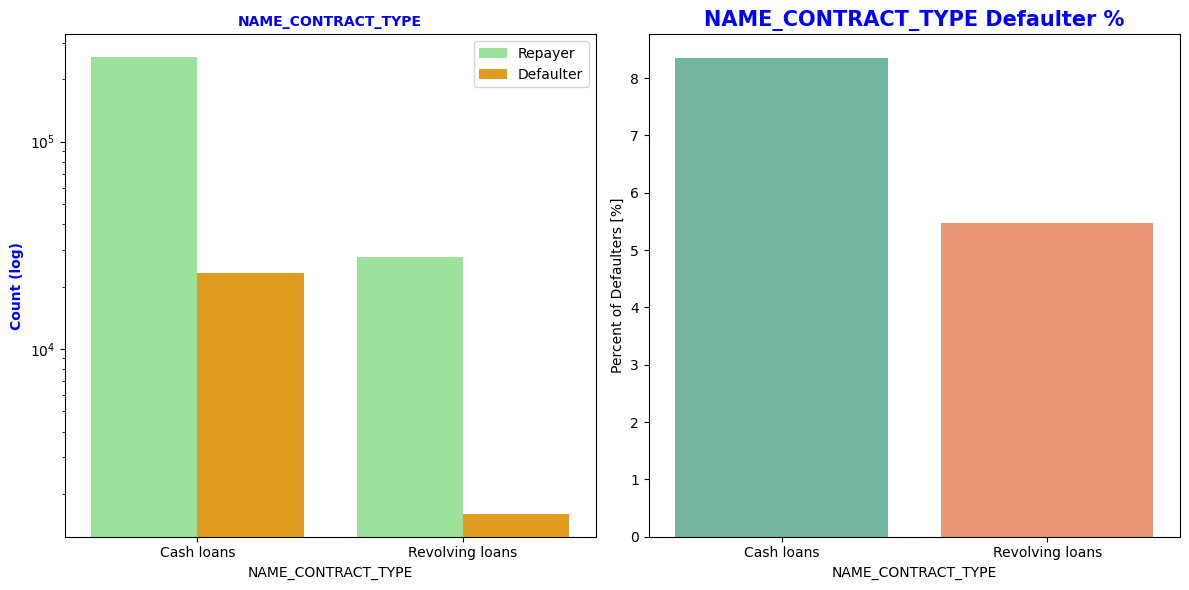

In [123]:
# Checking the contract type based on loan repayment status

univariate_categorical('NAME_CONTRACT_TYPE',True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid. 
    </span>    
</div>

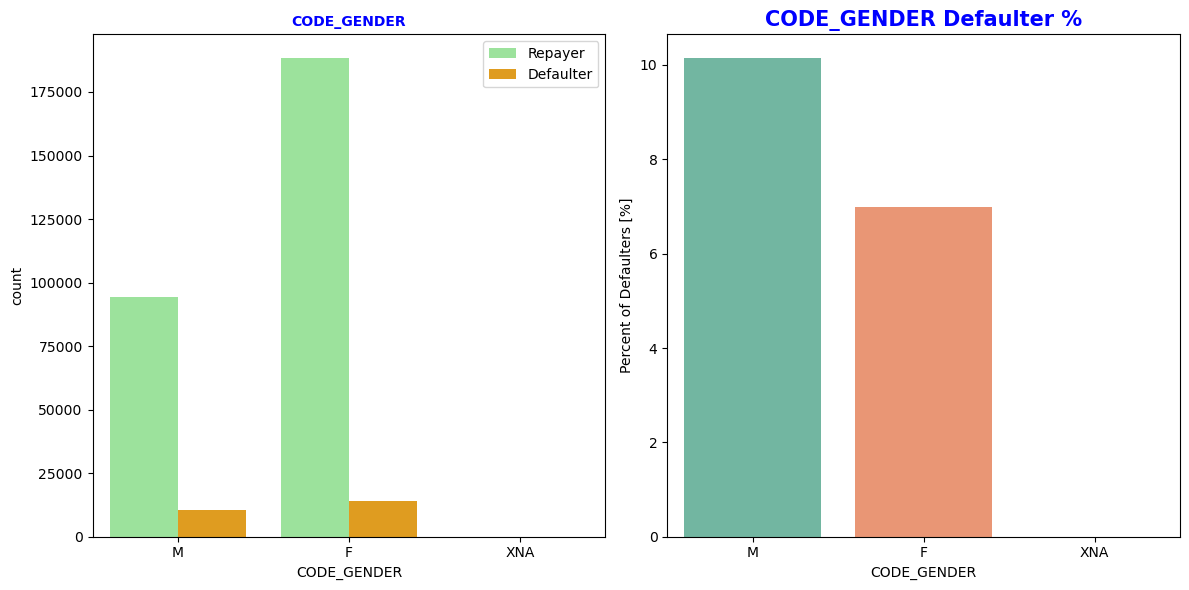

In [124]:
# Checking the type of Gender on loan repayment status

univariate_categorical('CODE_GENDER')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%)  
    </span>    
</div>

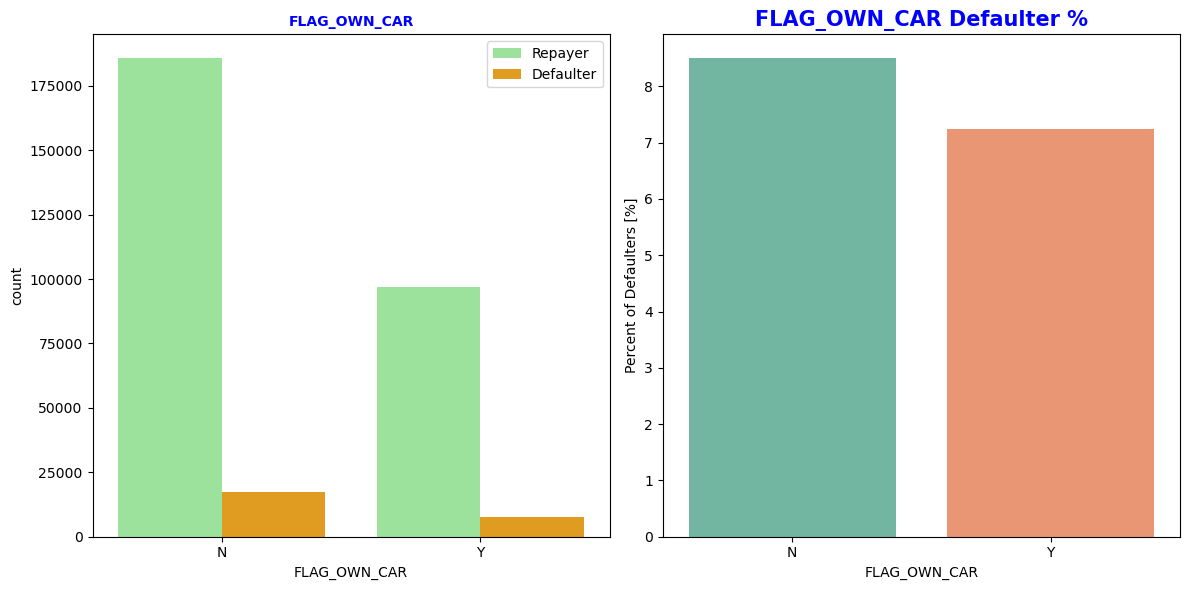

In [125]:
# Checking if owning a car is related to loan repayment status

univariate_categorical('FLAG_OWN_CAR')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.      
    </span>    
</div>

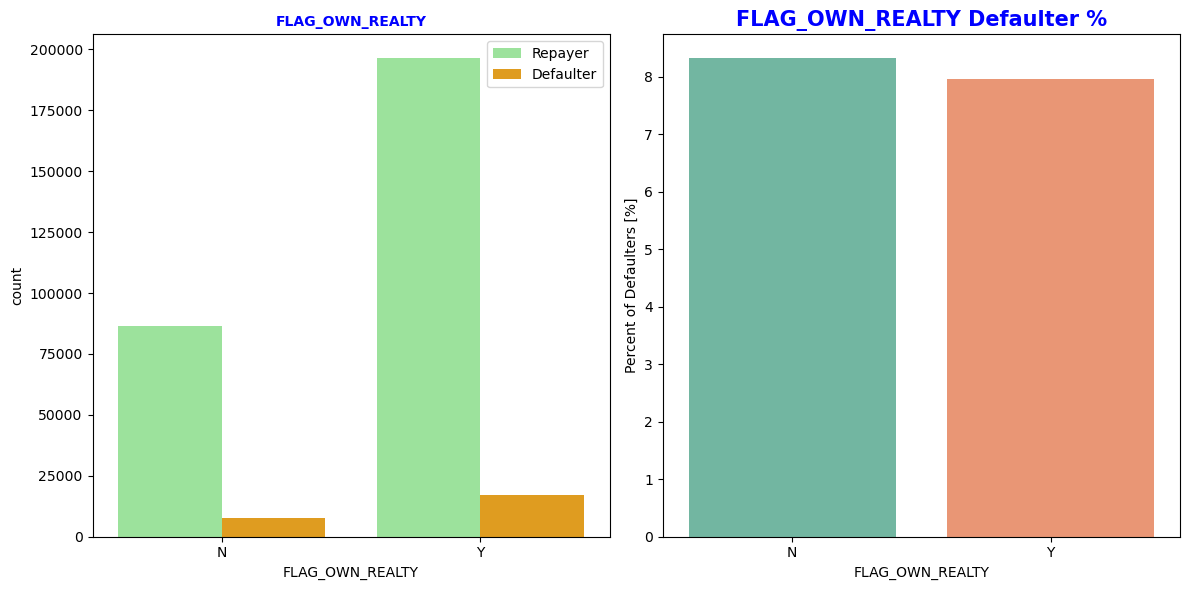

In [126]:
# Checking if owning a realty is related to loan repayment status

univariate_categorical('FLAG_OWN_REALTY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.      
    </span>    
</div>

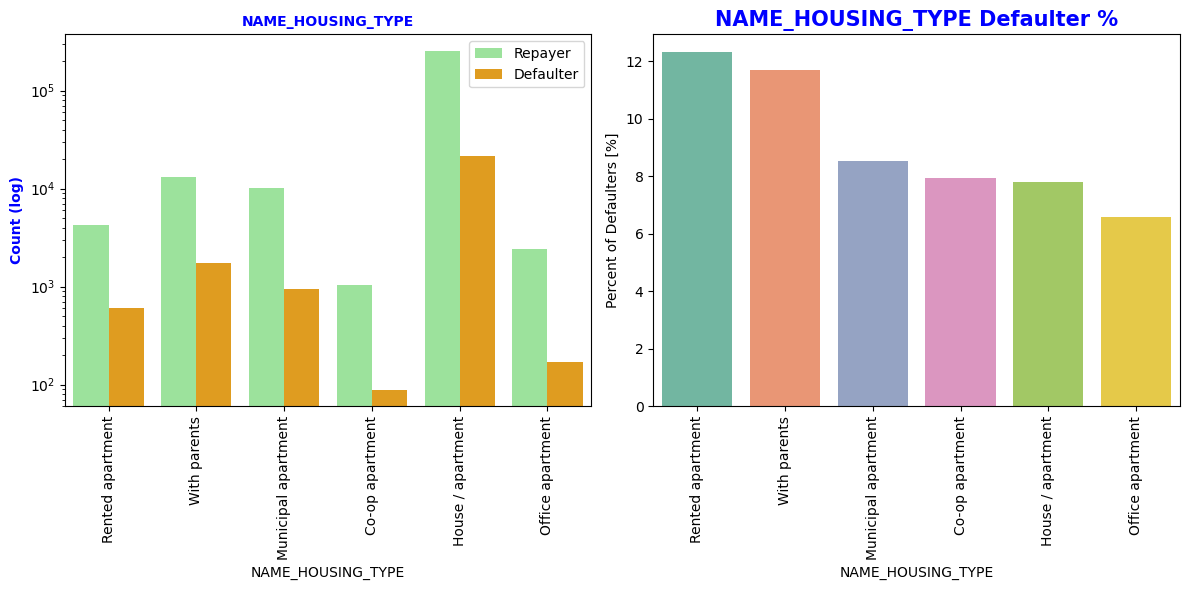

In [127]:
# Analyzing Housing Type based on loan repayment status

univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Majority of people live in House/apartment</li>
            <li>People living in office apartments have lowest default rate</li>
            <li>People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting </li>
        </ol>
    </span>    
</div>

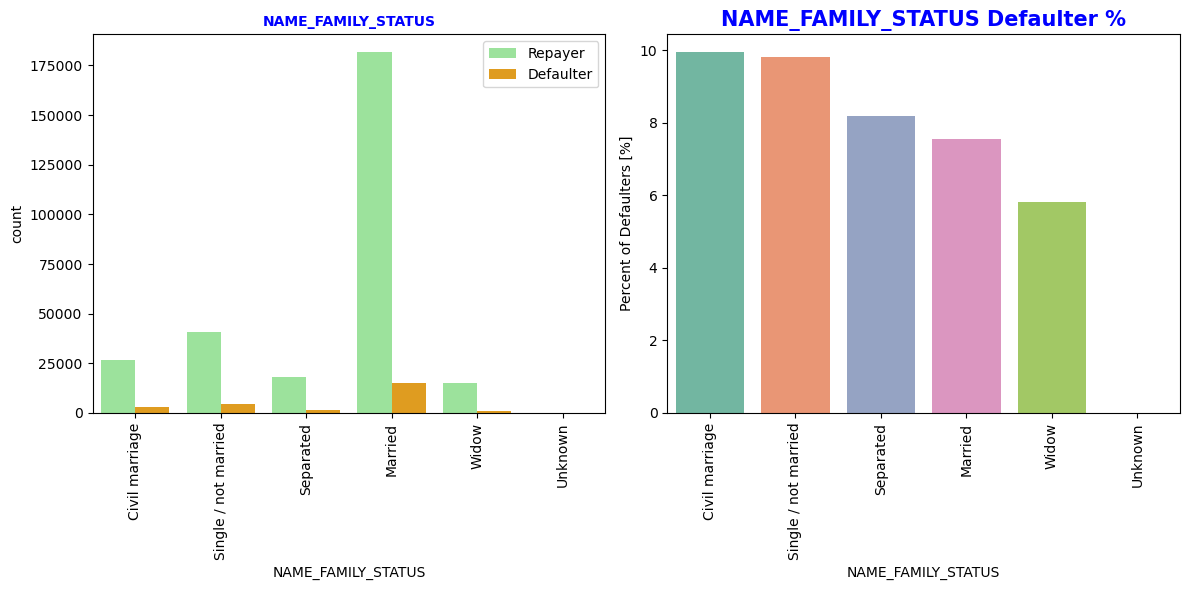

In [128]:
# Analyzing Family status based on loan repayment status

univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the people who have taken loan are married, followed by Single/not married and civil marriage </li>
            <li>In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown). </li>
        </ol>
    </span>    
</div>

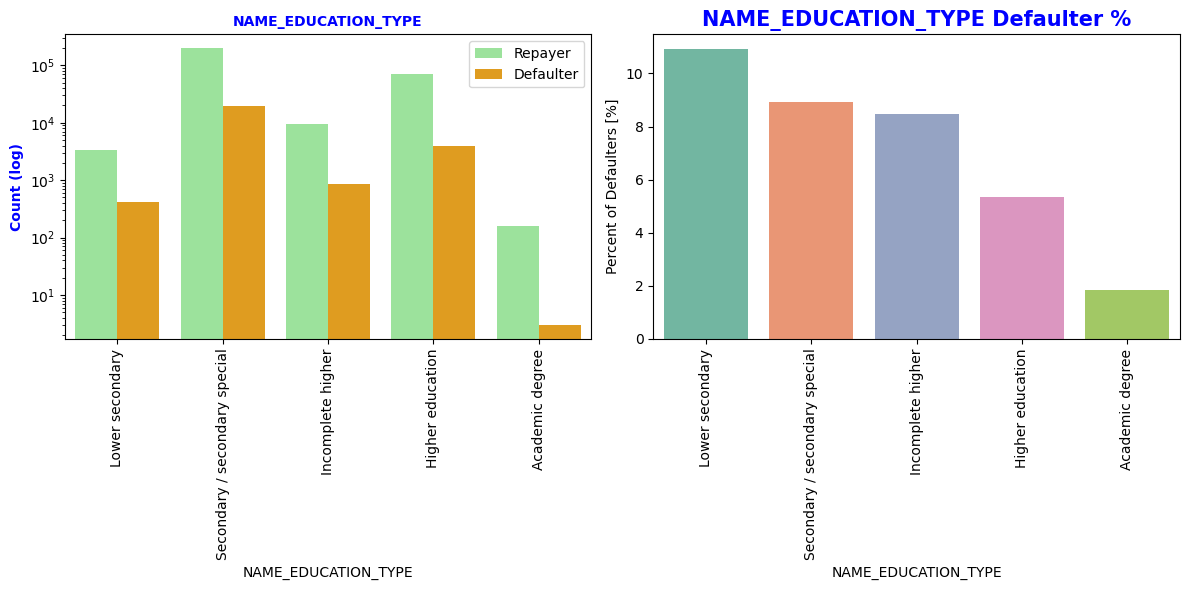

In [129]:
# Analyzing Education Type based on loan repayment status

univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree</li>
            <li>The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate. </li>
        </ol>
    </span>    
</div>

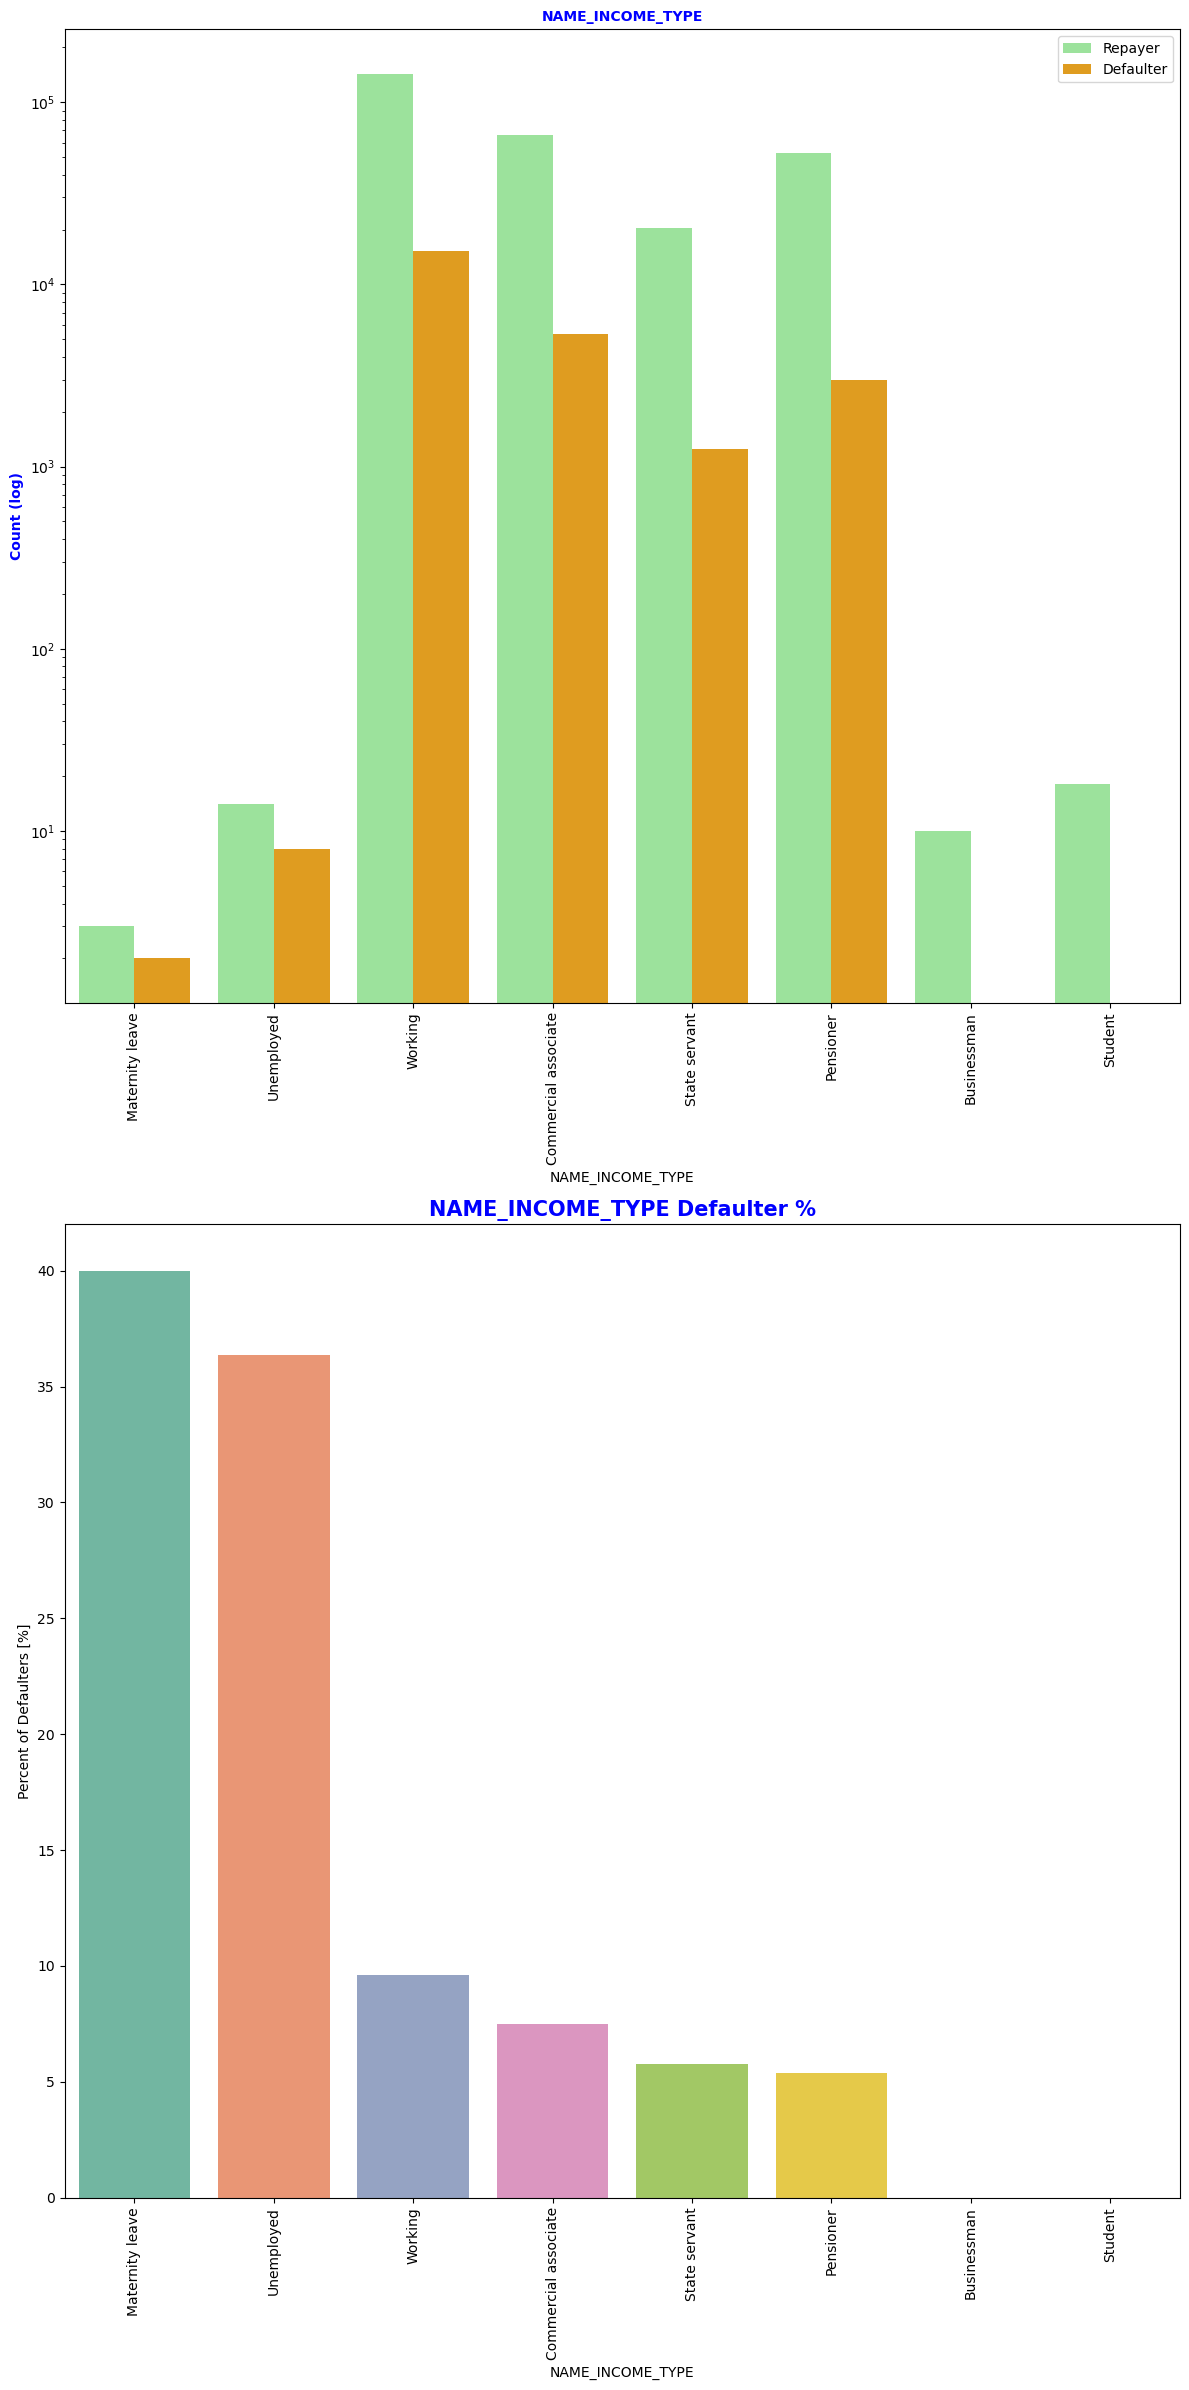

In [130]:
# Analyzing Income Type based on loan repayment status

univariate_categorical("NAME_INCOME_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li>Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.</li>
            <li>The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.</li>
            <li>Student and Businessmen, though less in numbers do not have any default record. Thus these two category are <b>safest</b> for providing loan.</li>  
        </ul>
    </span>    
</div>

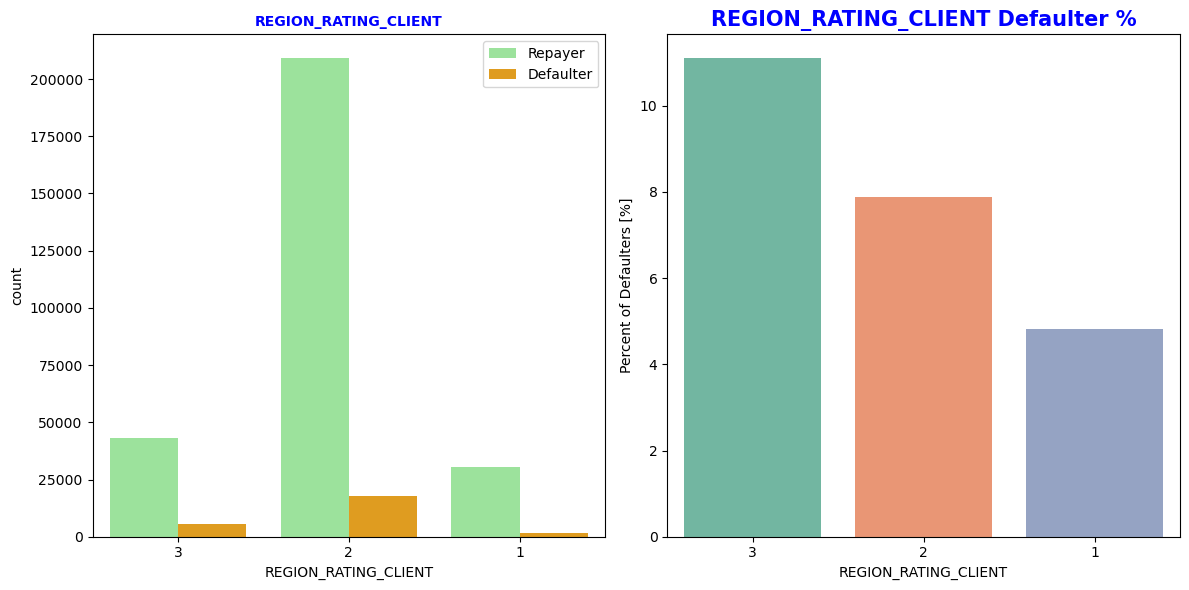

In [131]:
# Analyzing Region rating where applicant lives based on loan repayment status

univariate_categorical("REGION_RATING_CLIENT",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the applicants are living in Region_Rating 2 place.</li>
            <li>Region Rating 3 has the highest default rate (11%)</li>
            <li>Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus <b>safer</b> for approving loans </li>
        </ol>
    </span>    
</div>

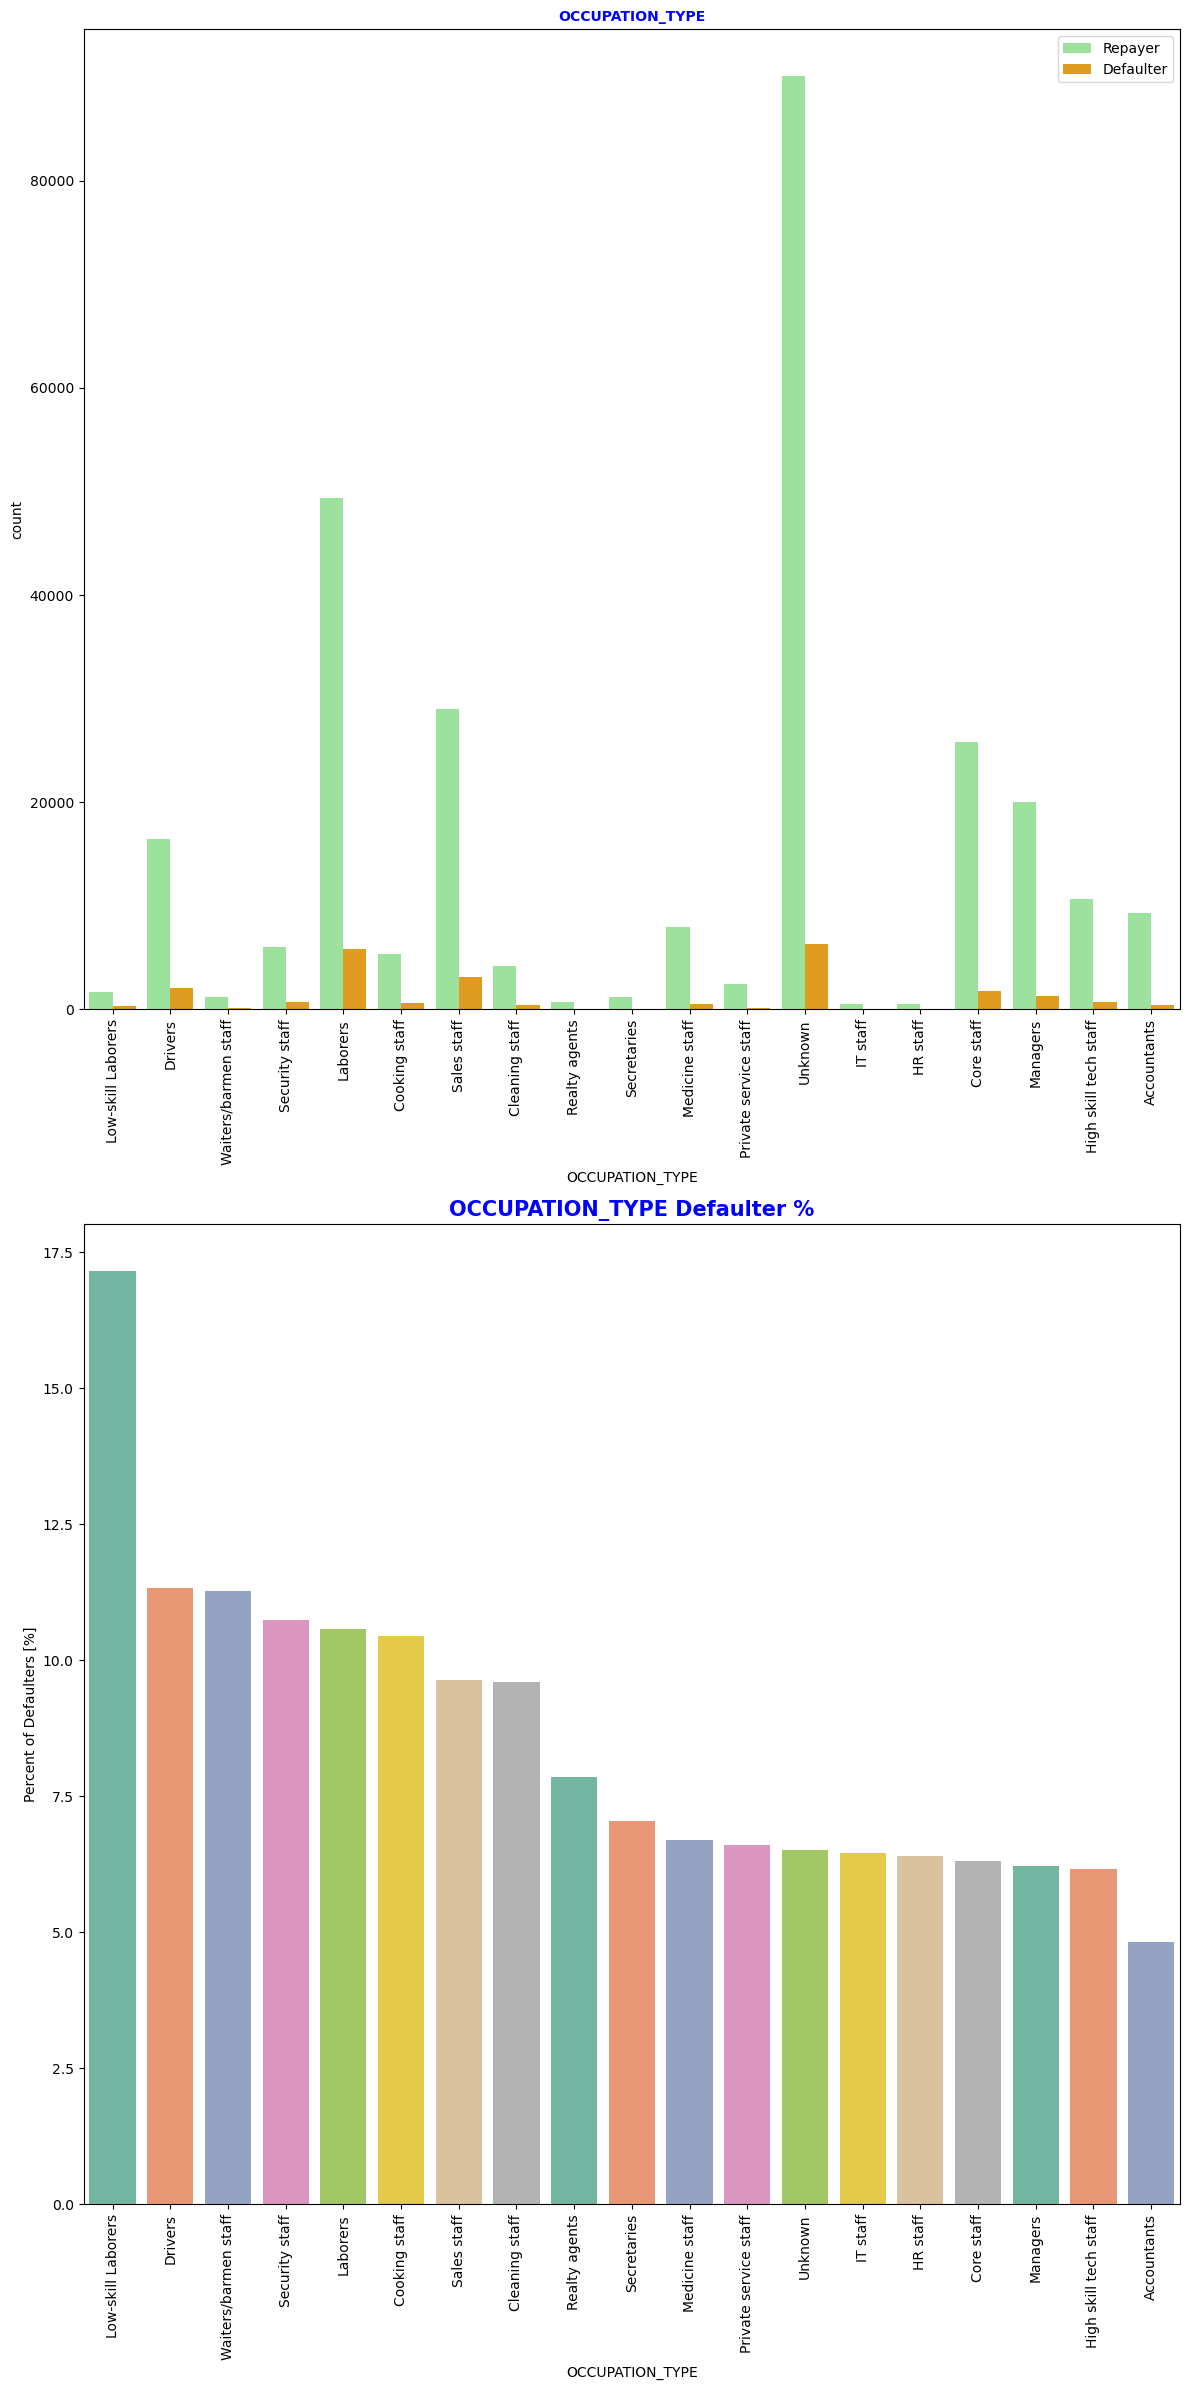

In [132]:
# Analyzing Occupation Type where applicant lives based on loan repayment status

univariate_categorical("OCCUPATION_TYPE",False,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.</li>
            <li>The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff. </li>
        </ol>
    </span>    
</div>

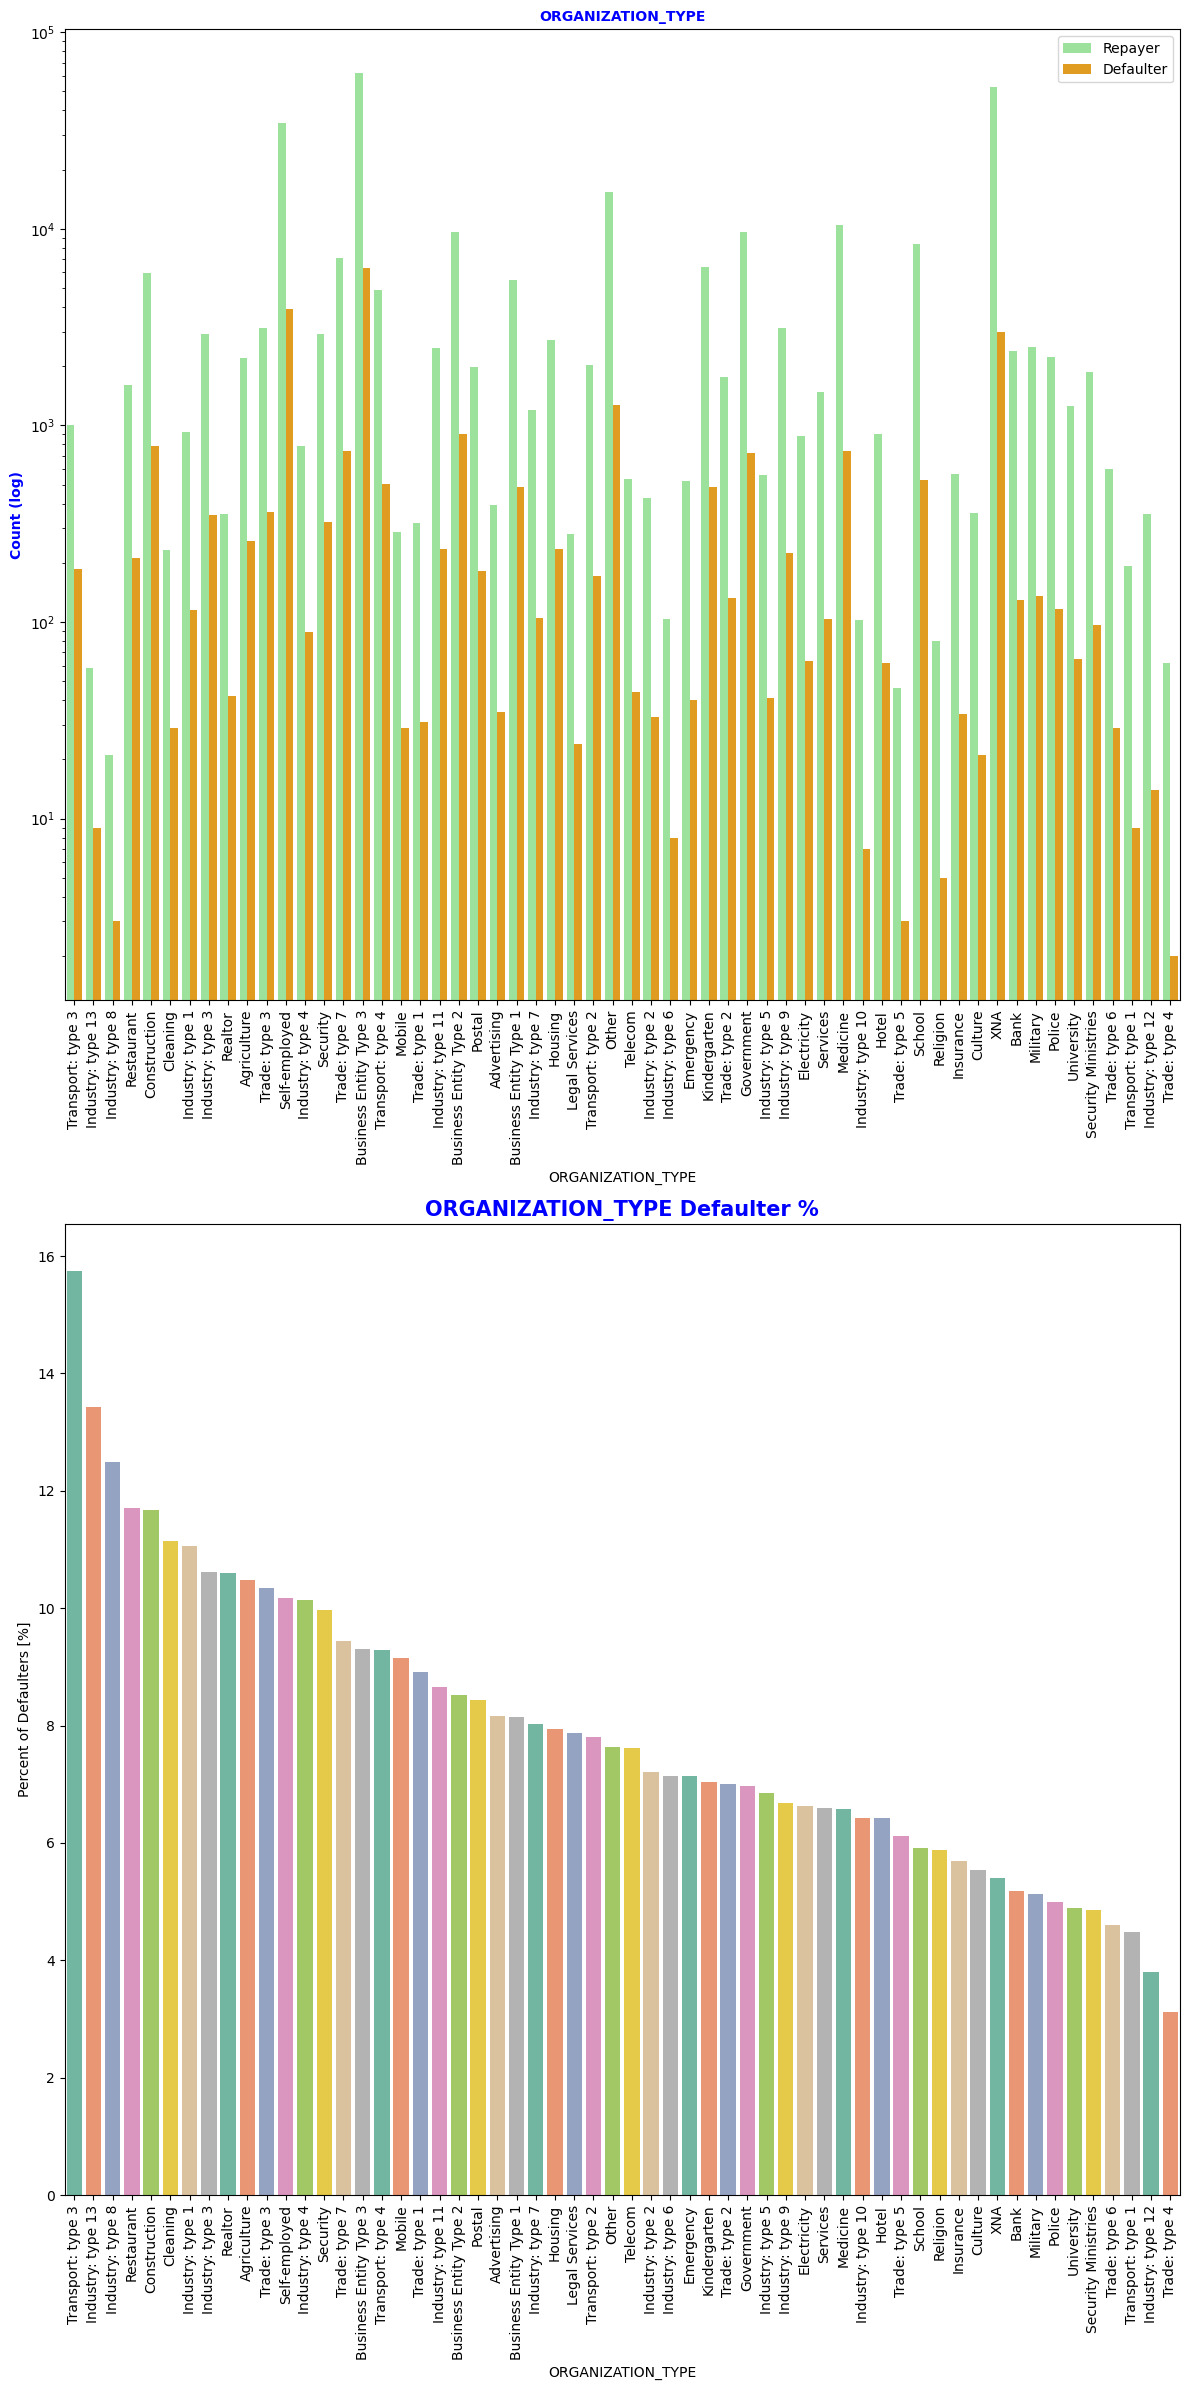

In [133]:
# Checking Loan repayment status based on Organization type

univariate_categorical("ORGANIZATION_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.</li>
            <li>Most of the people application for loan are from Business Entity Type 3 </li>
            <li>For a very high number of applications, Organization type information is unavailable(XNA)</li>
        </ol>
        It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
        <ul>
            <li>Trade Type 4 and 5</li>
            <li>Industry type 8</li>
        </ul>
    </span>    
</div>

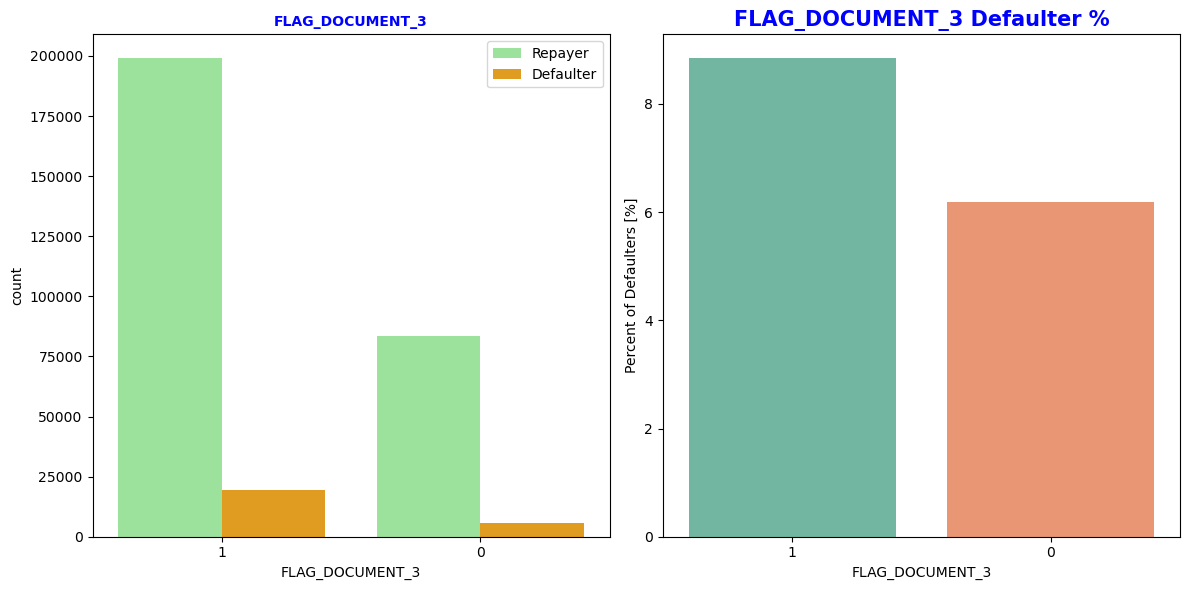

In [134]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status

univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)
    </span>    
</div>

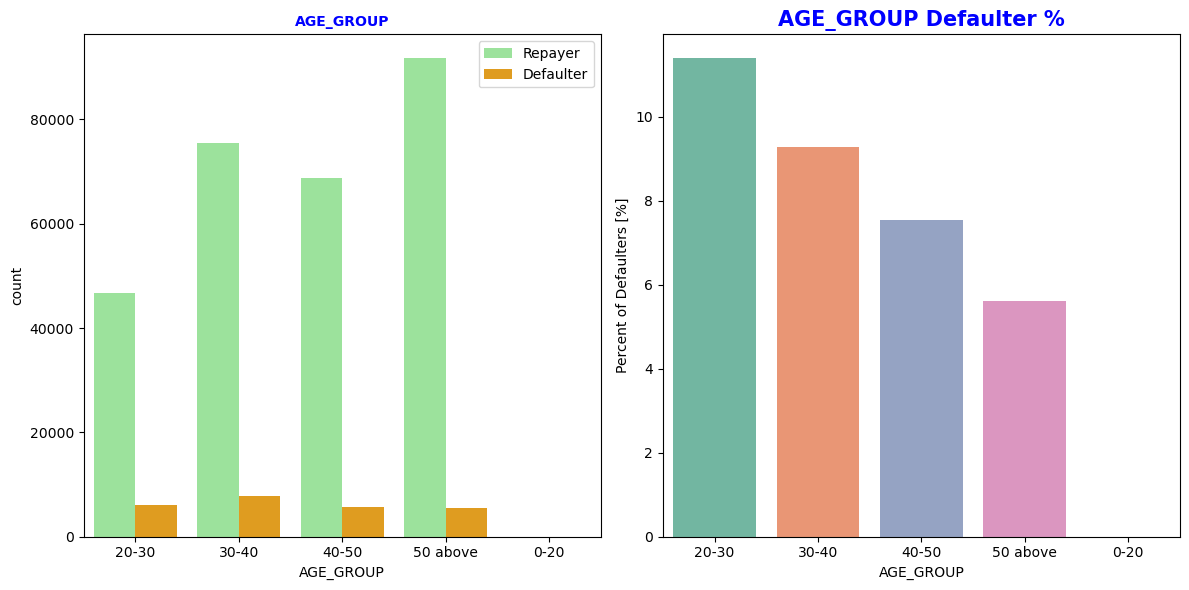

In [135]:
# Analyzing Age Group based on loan repayment status

univariate_categorical("AGE_GROUP",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>People in the age group range 20-40 have higher probability of defaulting</li>
            <li>People above age of 50 have low probability of defailting </li>
        </ol>
    </span>    
</div>

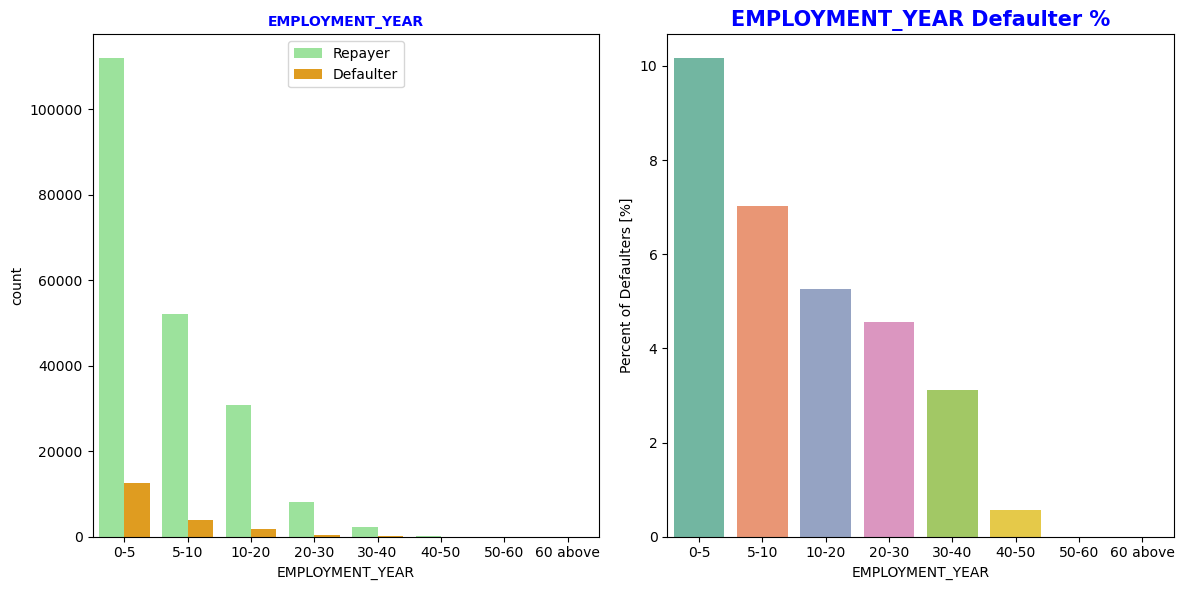

In [136]:
# Analyzing Employment_Year based on loan repayment status

univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%</li>
            <li>With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate </li>
        </ol>
    </span>    
</div>

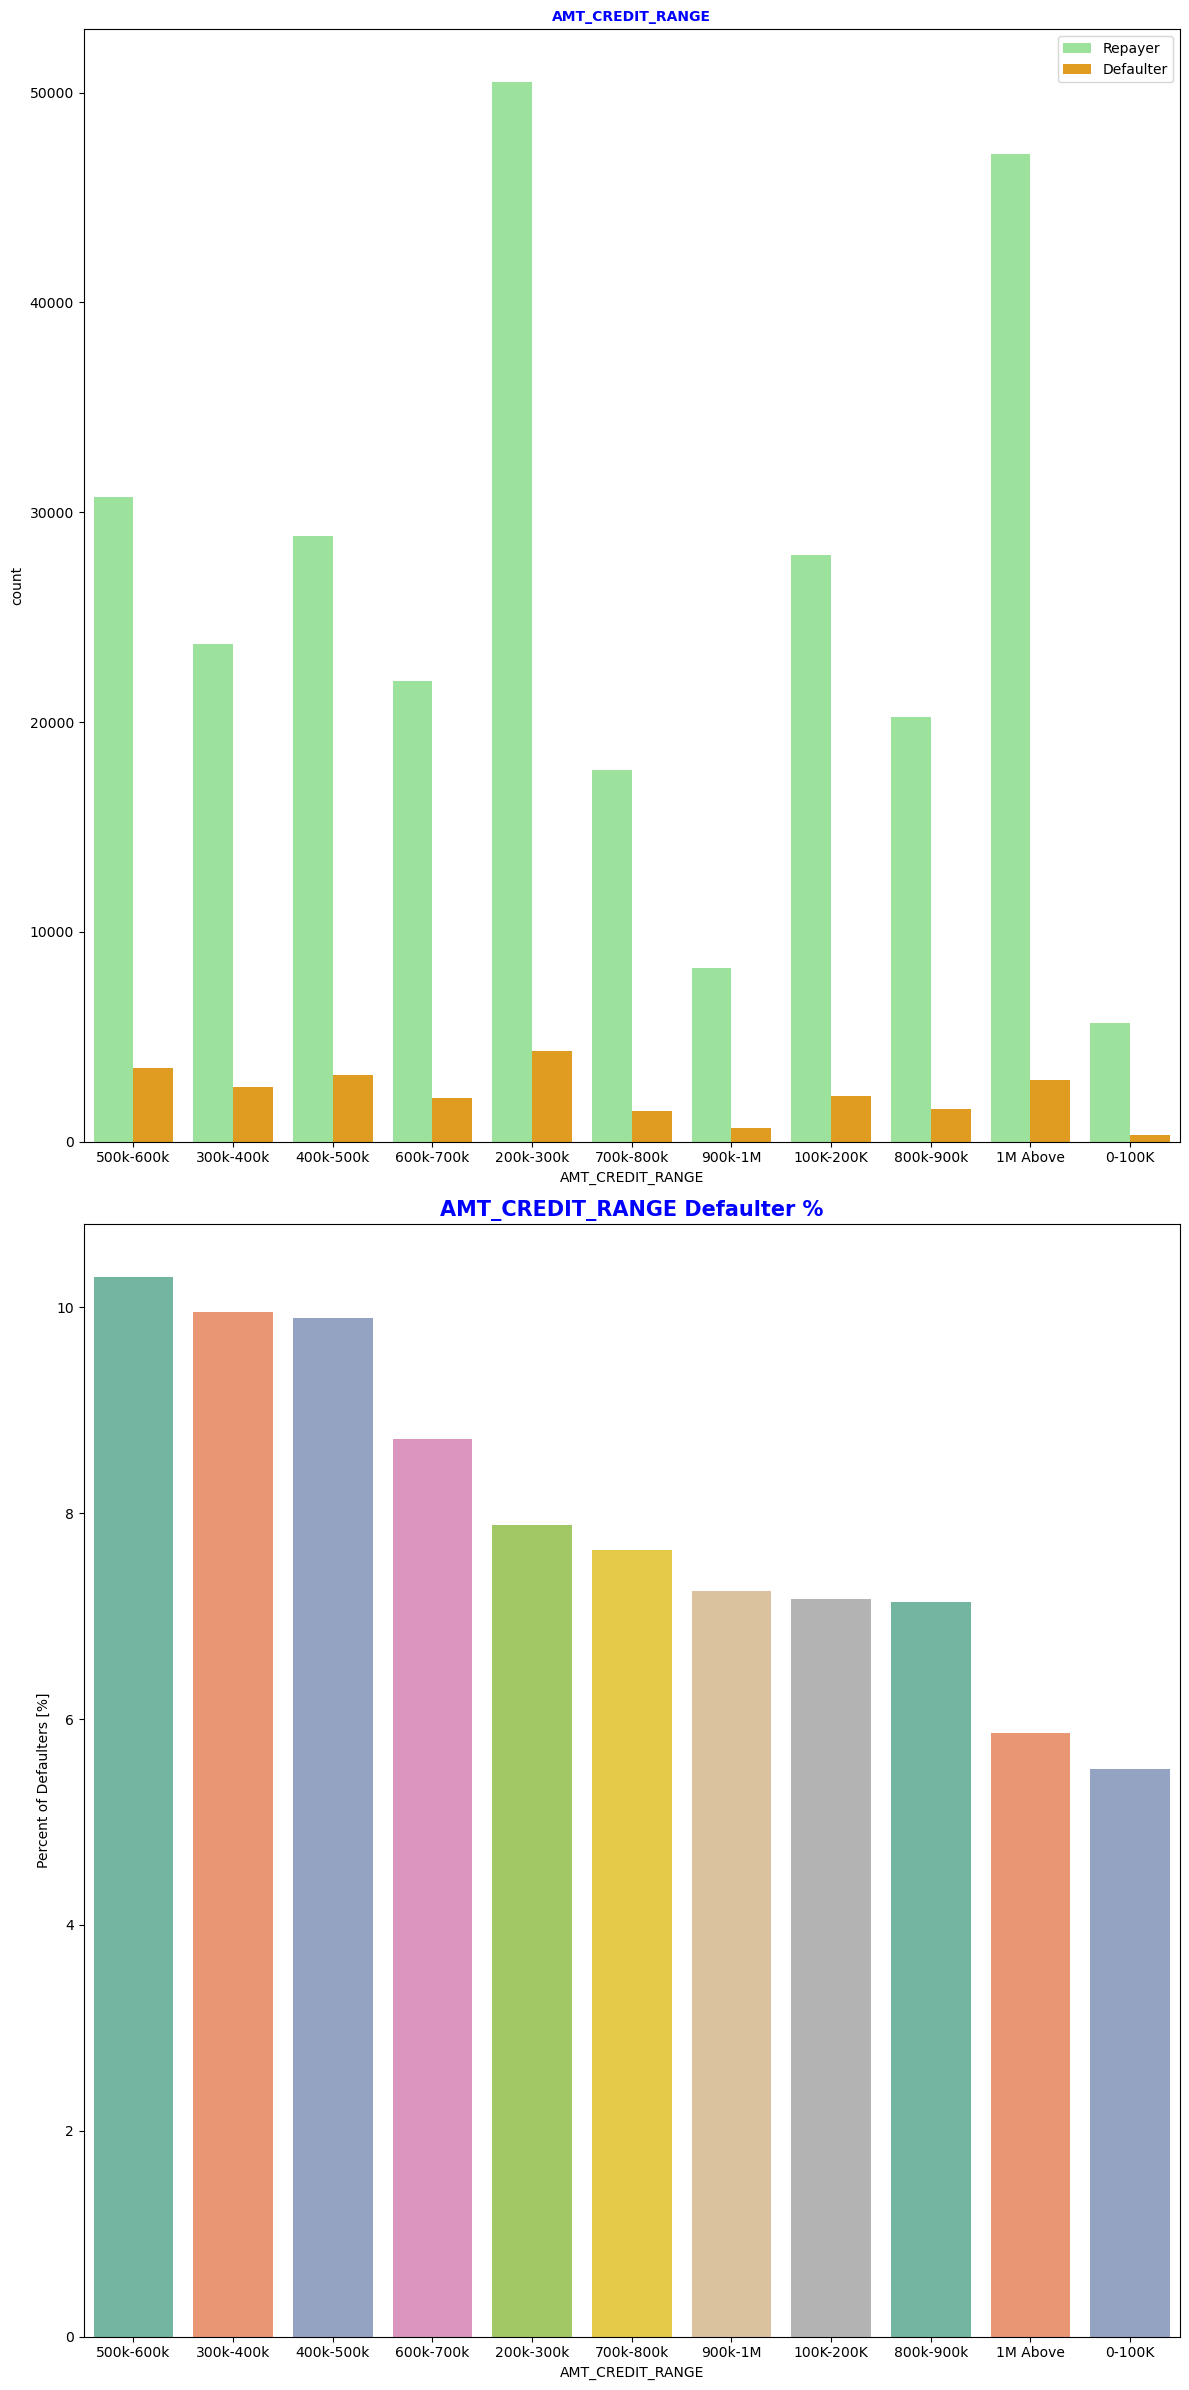

In [137]:
# Analyzing Amount_Credit based on loan repayment status

univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>More than 80% of the loan provided are for amount less than 900,000</li>
            <li>People who get loan for 300-600k tend to default more than others. </li>
        </ol>
    </span>    
</div>

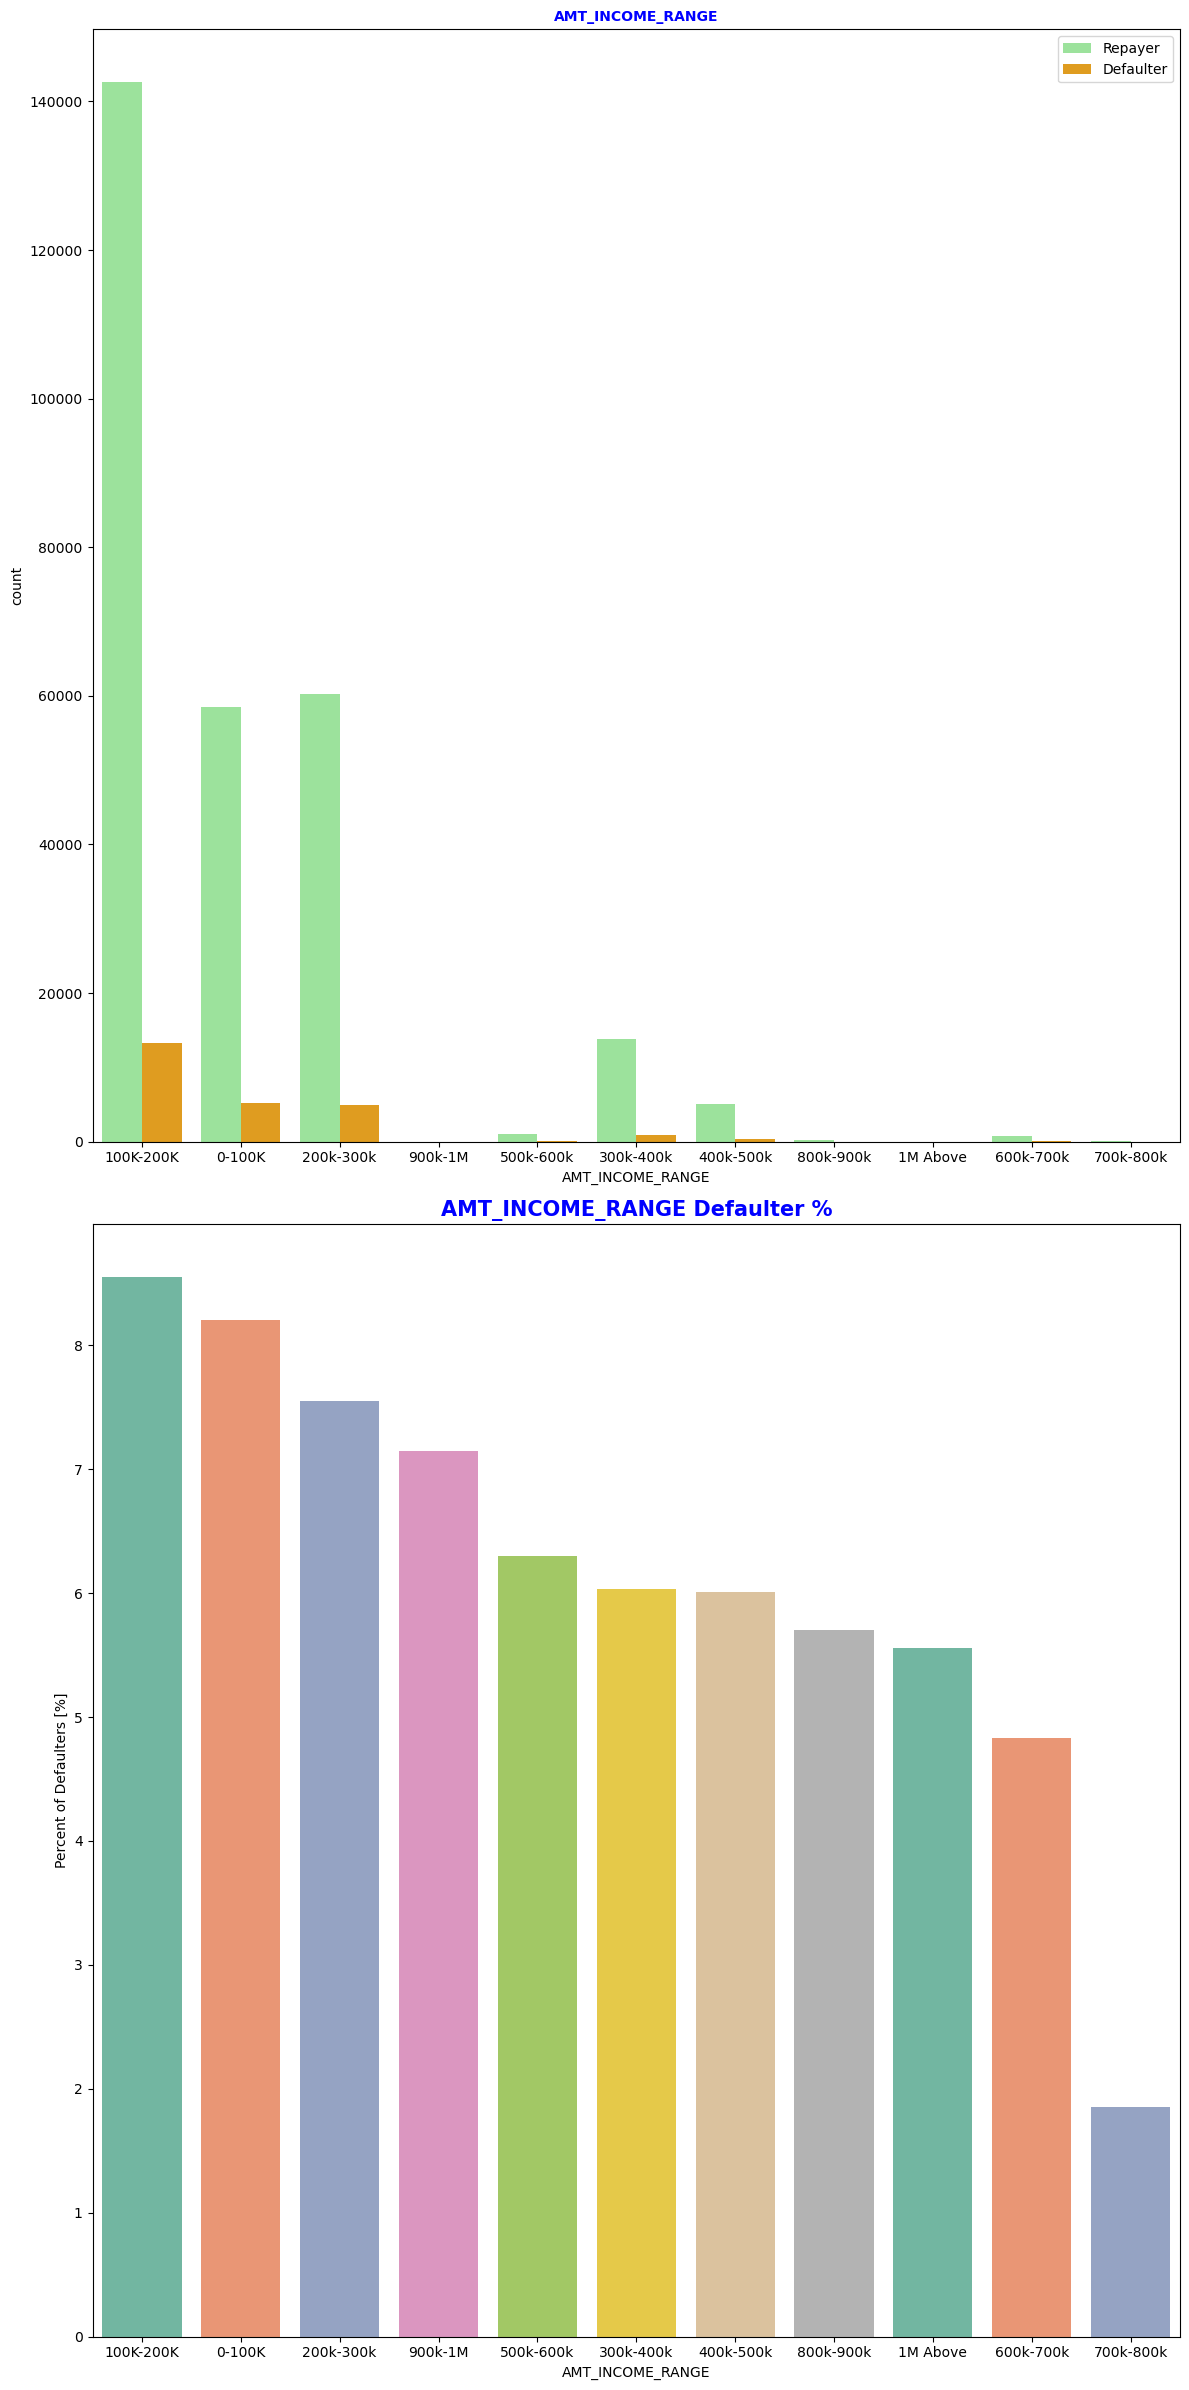

In [139]:
# Analyzing Amount_Income Range based on loan repayment status

univariate_categorical("AMT_INCOME_RANGE",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>90% of the applications have Income total less than 300,000</li>
            <li>Application with Income less than 300,000 has high probability of defaulting</li>
            <li>Applicant with Income more than 700,000 are less likely to default </li>
        </ol>
    </span>    
</div>

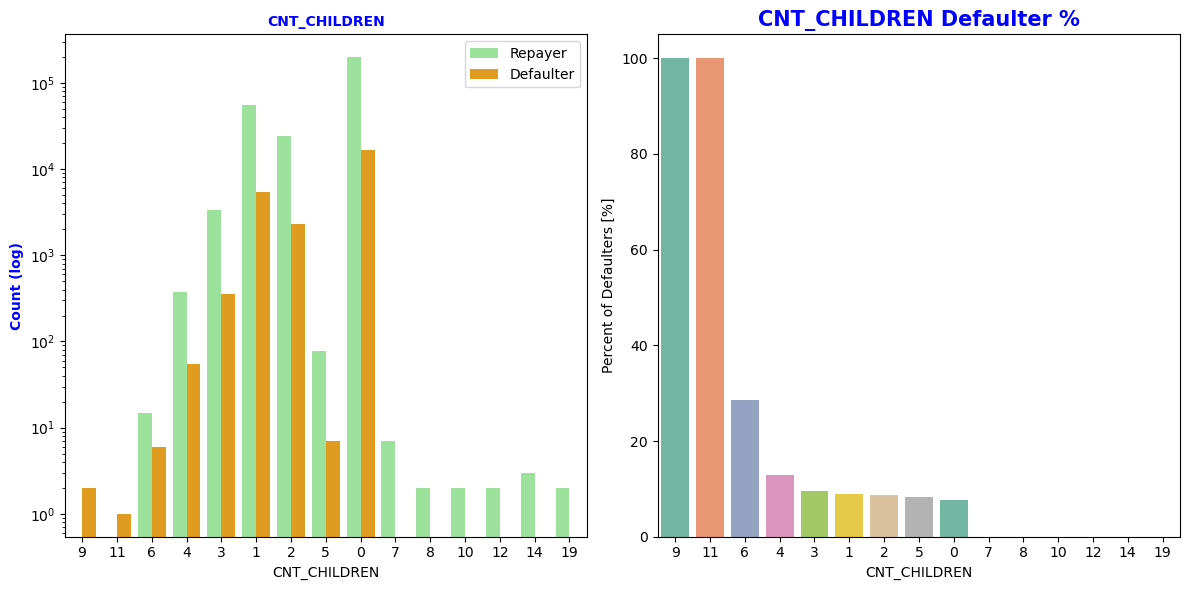

In [140]:
# Analyzing Number of children based on loan repayment status

univariate_categorical("CNT_CHILDREN",True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the applicants do not have children</li>
            <li>Very few clients have more than 3 children.</li>
            <li>Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate</li>
        </ol>
    </span>    
</div>

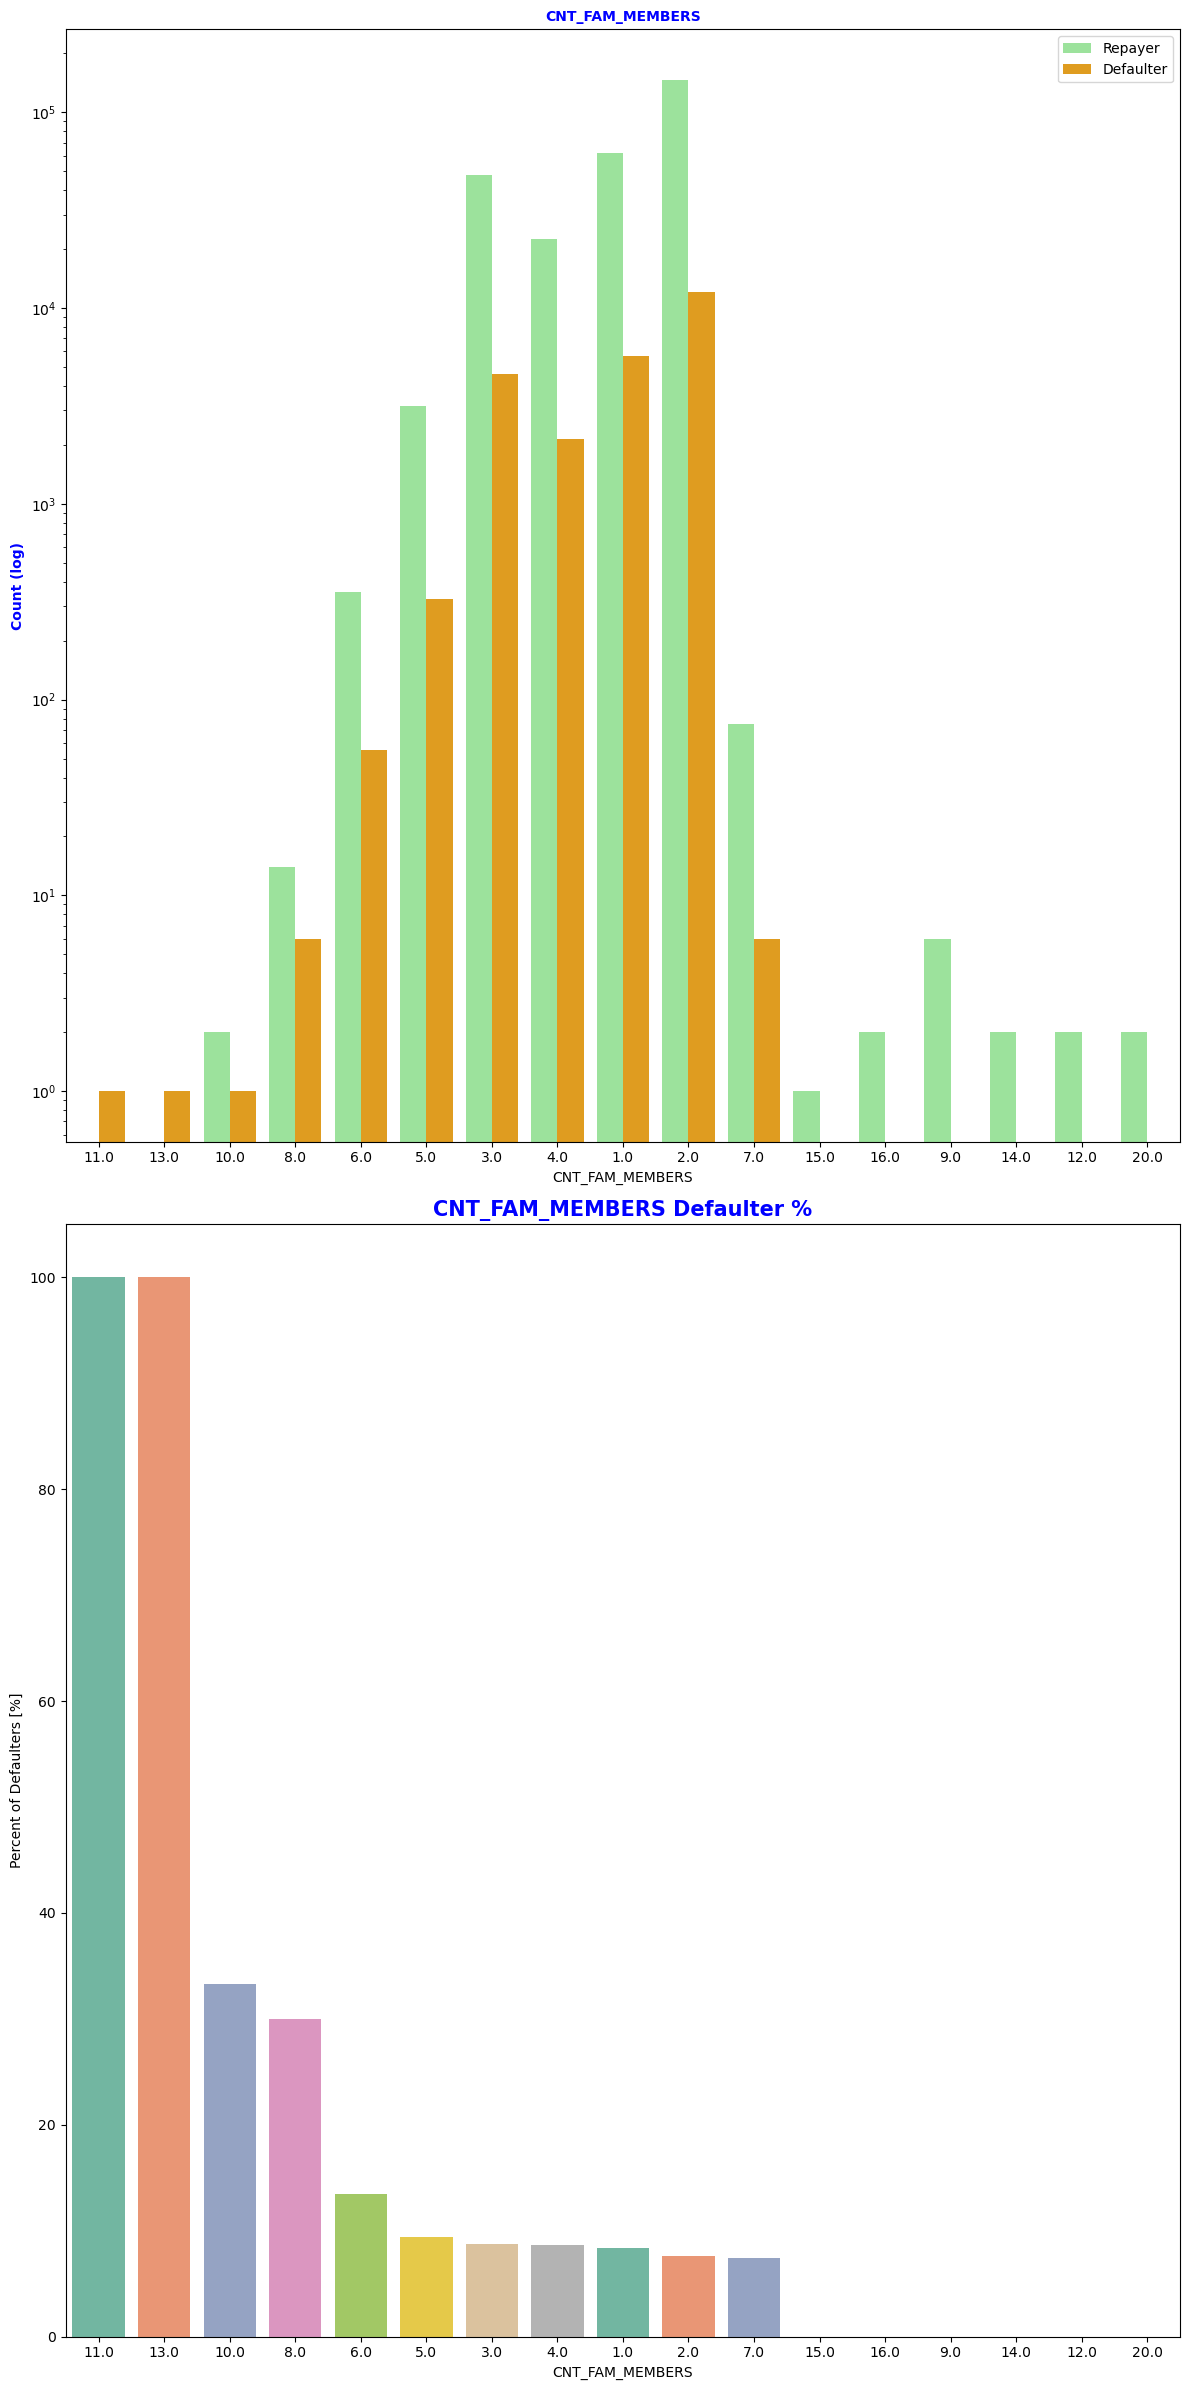

In [141]:
# Analyzing Number of family members based on loan repayment status

univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Family member follows the same trend as children where having more family members increases the risk of defaulting
    </span>    
</div>

<h4>   
      <font color = green >
            <span style='font-family:Georgia'>
             Categorical Bi/Multivariate Analysis
            </span>   
        </font>    
</h4>

In [144]:
applicationDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

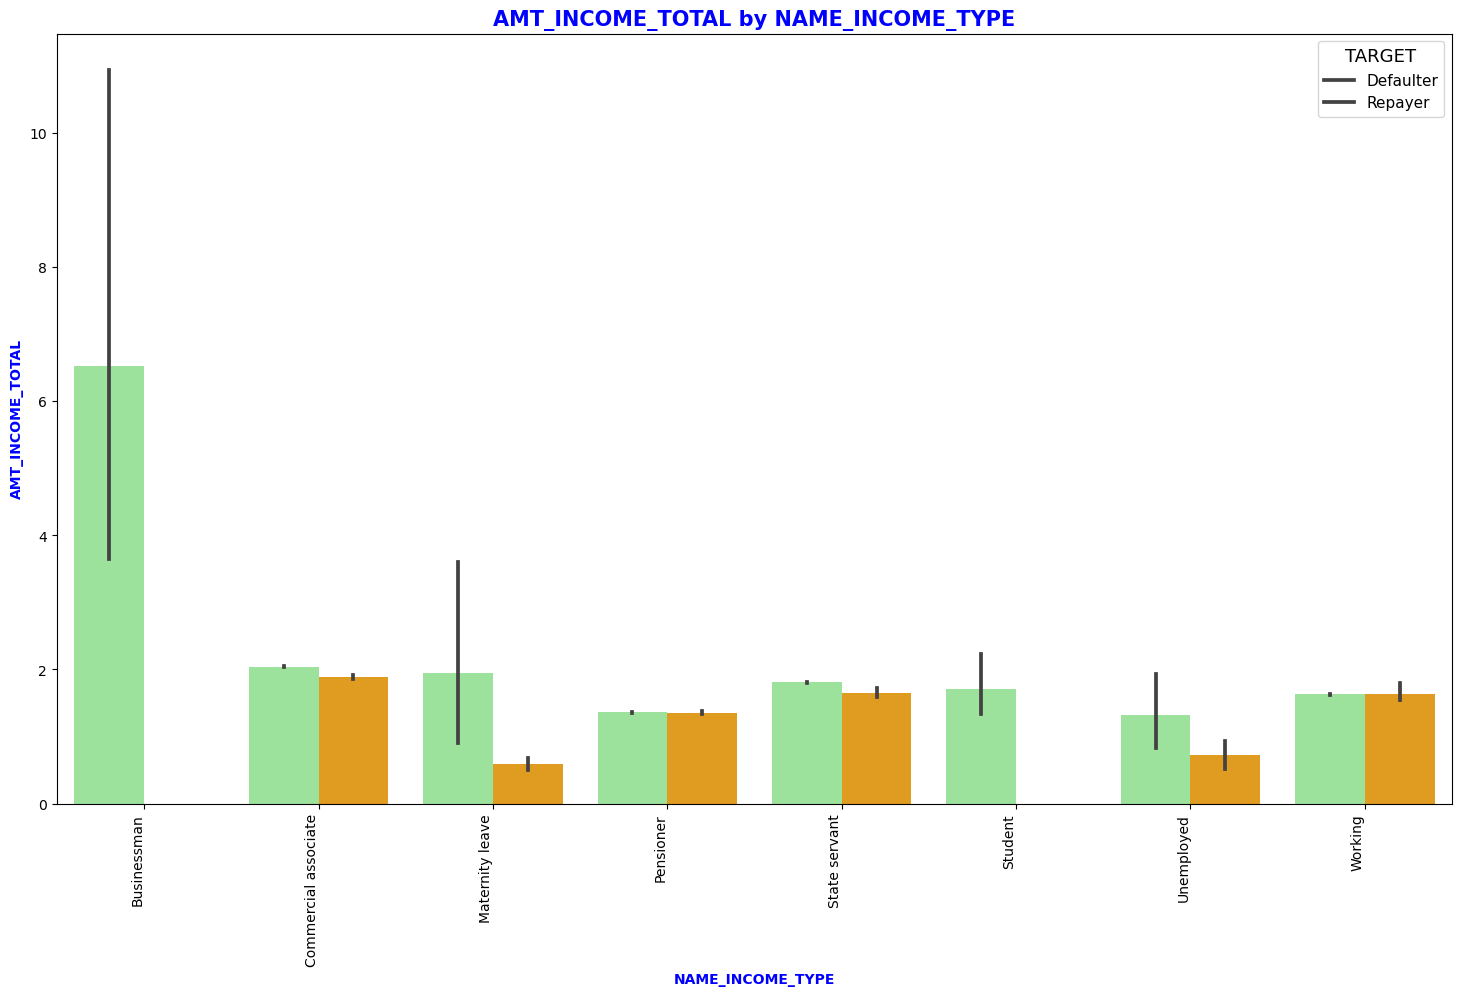

In [149]:
# Income type vs Income Amount Range

bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",applicationDF,"TARGET",(18,10))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs
    </span>    
</div>

<a id="numvar"></a>
<h3>   
      <font color = green >
            <span style='font-family:Georgia'>
             Numeric Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = green >
            <span style='font-family:Georgia'>
             Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
            </span>   
        </font>    
</h4>

In [150]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [151]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = applicationDF.loc[applicationDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = applicationDF.loc[applicationDF['TARGET']==1, cols_for_correlation] # Defaulters

<h4>   
      <font color = green >
            <span style='font-family:Georgia'>
             Correlation between numeric variable
            </span>   
        </font>    
</h4>

In [154]:
# Getting the top 10 correlation for the Repayers data
# Calculate the correlation matrix
corr_repayer = Repayer_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_repayer.shape), k=1).astype(bool)
corr_repayer = corr_repayer.where(mask)

# Convert the matrix to a long-format DataFrame
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corr_df_repayer.dropna(subset=["Correlation"], inplace=True)

# Use absolute values of the correlations for sorting
corr_df_repayer["Correlation"] = corr_df_repayer["Correlation"].abs()

# Sort by correlation value in descending order
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)

# Display the top 10 correlations
top_10_corr = corr_df_repayer.head(10)
top_10_corr

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

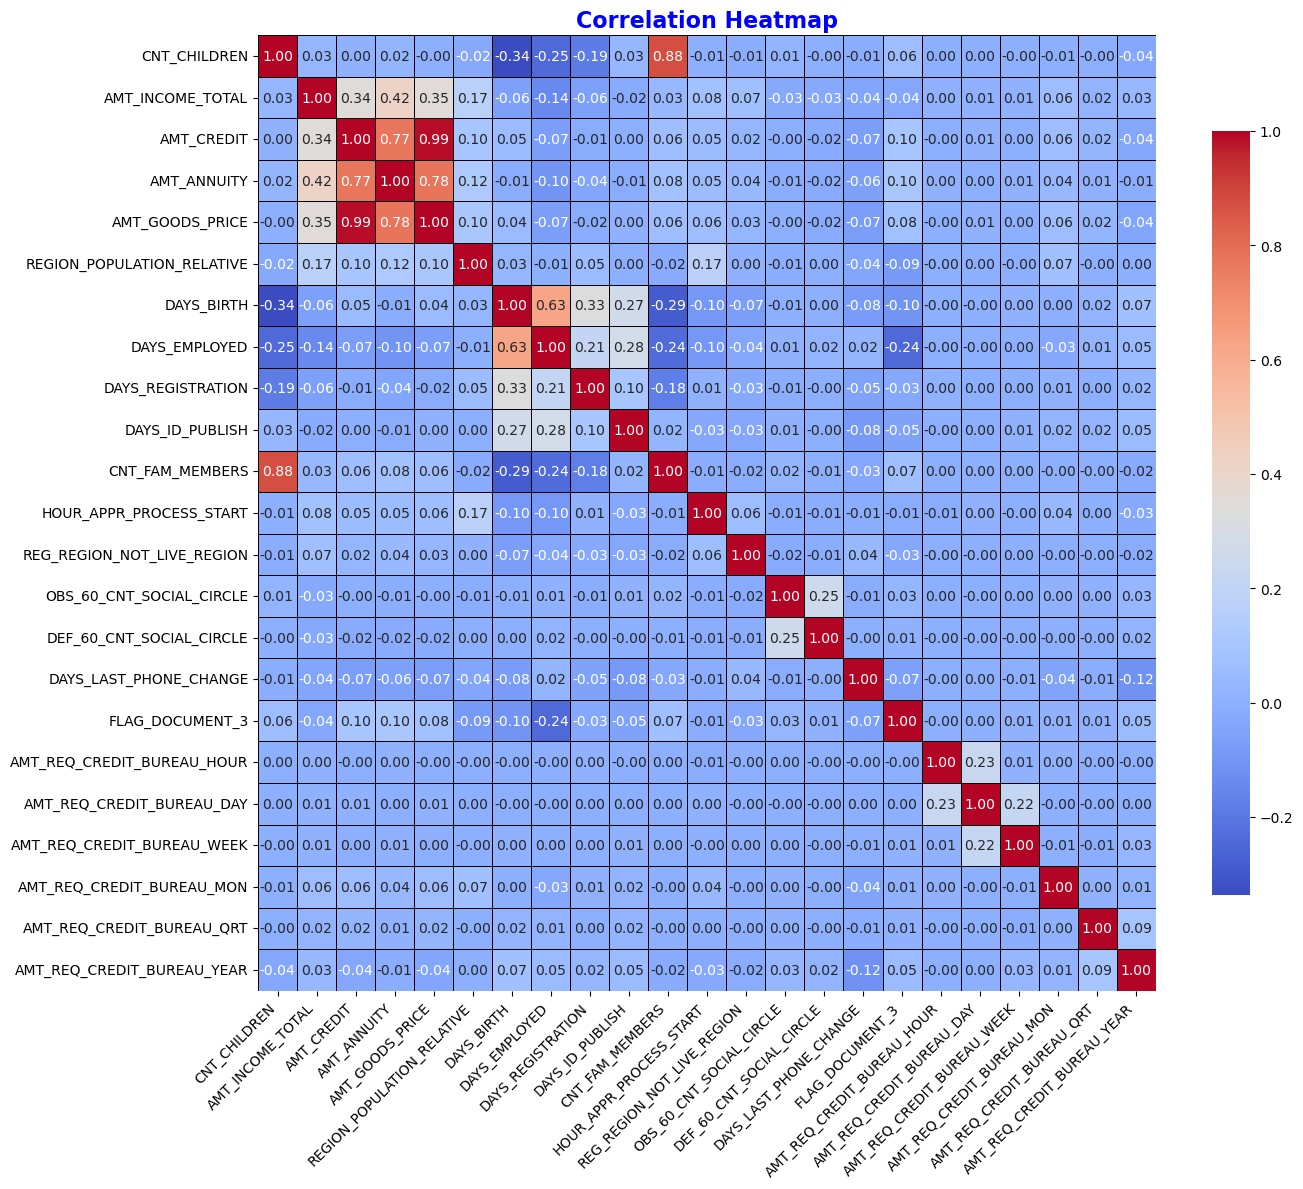

In [155]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot heatmap 
sns.heatmap(Repayer_df.corr(), 
            cmap='coolwarm',   
            annot=True,       
            fmt=".2f",         
            linewidths=0.5,    
            linecolor='black', 
            cbar_kws={"shrink": .8},  
            ax=ax)

# Improve readability
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='blue')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()  

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Correlating factors amongst repayers:<br>
            Credit amount is highly correlated with
            <ul>                
                <li> amount of goods price</li>
                <li> loan annuity</li>
                <li> total income</li>
        </ul>
        We can also see that repayers have high correlation in number of days employed.
    </span>    
</div>

In [157]:
# Getting the top 10 correlation for the Defaulter data
# Calculate the correlation matrix
corr_defaulter = Defaulter_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_defaulter.shape), k=1).astype(bool)
corr_defaulter = corr_defaulter.where(mask)

# Convert the matrix to a long-format DataFrame
corr_df_defaulter = corr_defaulter.unstack().reset_index()
corr_df_defaulter.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corr_df_defaulter.dropna(subset=["Correlation"], inplace=True)

# Use absolute values of the correlations for sorting
corr_df_defaulter["Correlation"] = corr_df_defaulter["Correlation"].abs()

# Sort by correlation value in descending order
corr_df_defaulter.sort_values(by='Correlation', ascending=False, inplace=True)

# Display the top 10 correlations
top_10_corr_defaulter = corr_df_defaulter.head(10)
top_10_corr_defaulter

VAR1                      VAR2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

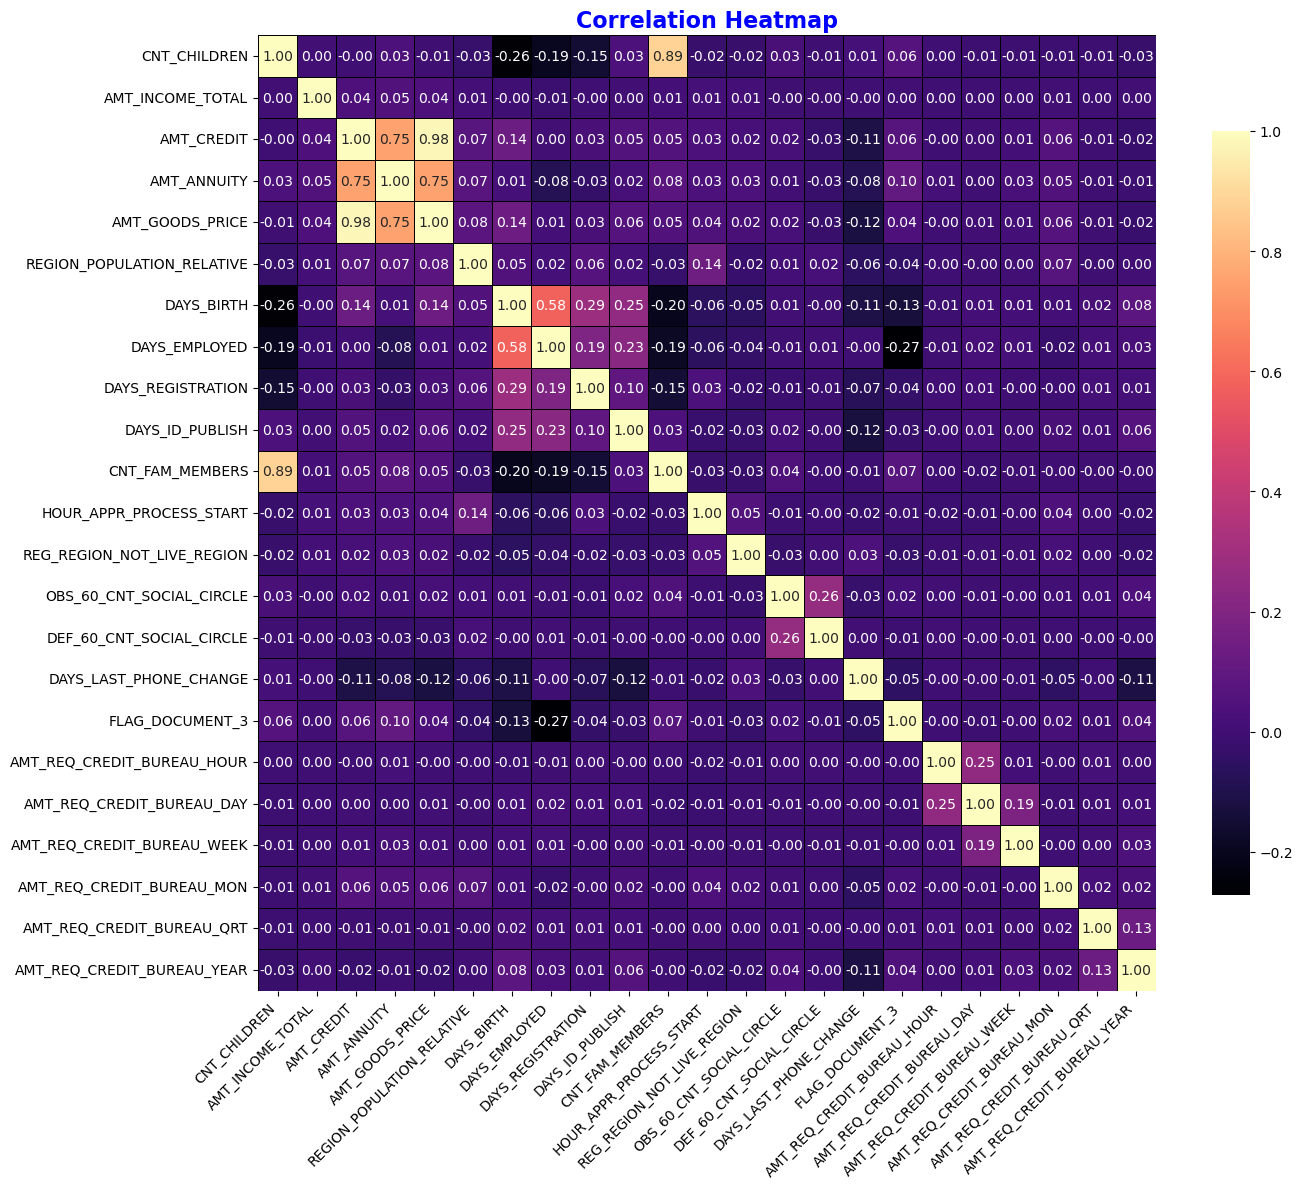

In [159]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot heatmap 
sns.heatmap(Defaulter_df.corr(), 
            cmap='magma',   
            annot=True,       
            fmt=".2f",         
            linewidths=0.5,    
            linecolor='black', 
            cbar_kws={"shrink": .8},  
            ax=ax)

# Improve readability
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='blue')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()  

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> Credit amount is highly correlated with amount of goods price which is same as repayers. </li>
            <li> But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)</li>
            <li> We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).</li>
            <li> There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.</li>
            <li> Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.</li>
            <li> There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)</li>
        </ul>
    </span>    
</div>

<h4>   
      <font color = green >
            <span style='font-family:Georgia'>
             Numerical Univariate Analysis
            </span>   
        </font>    
</h4>

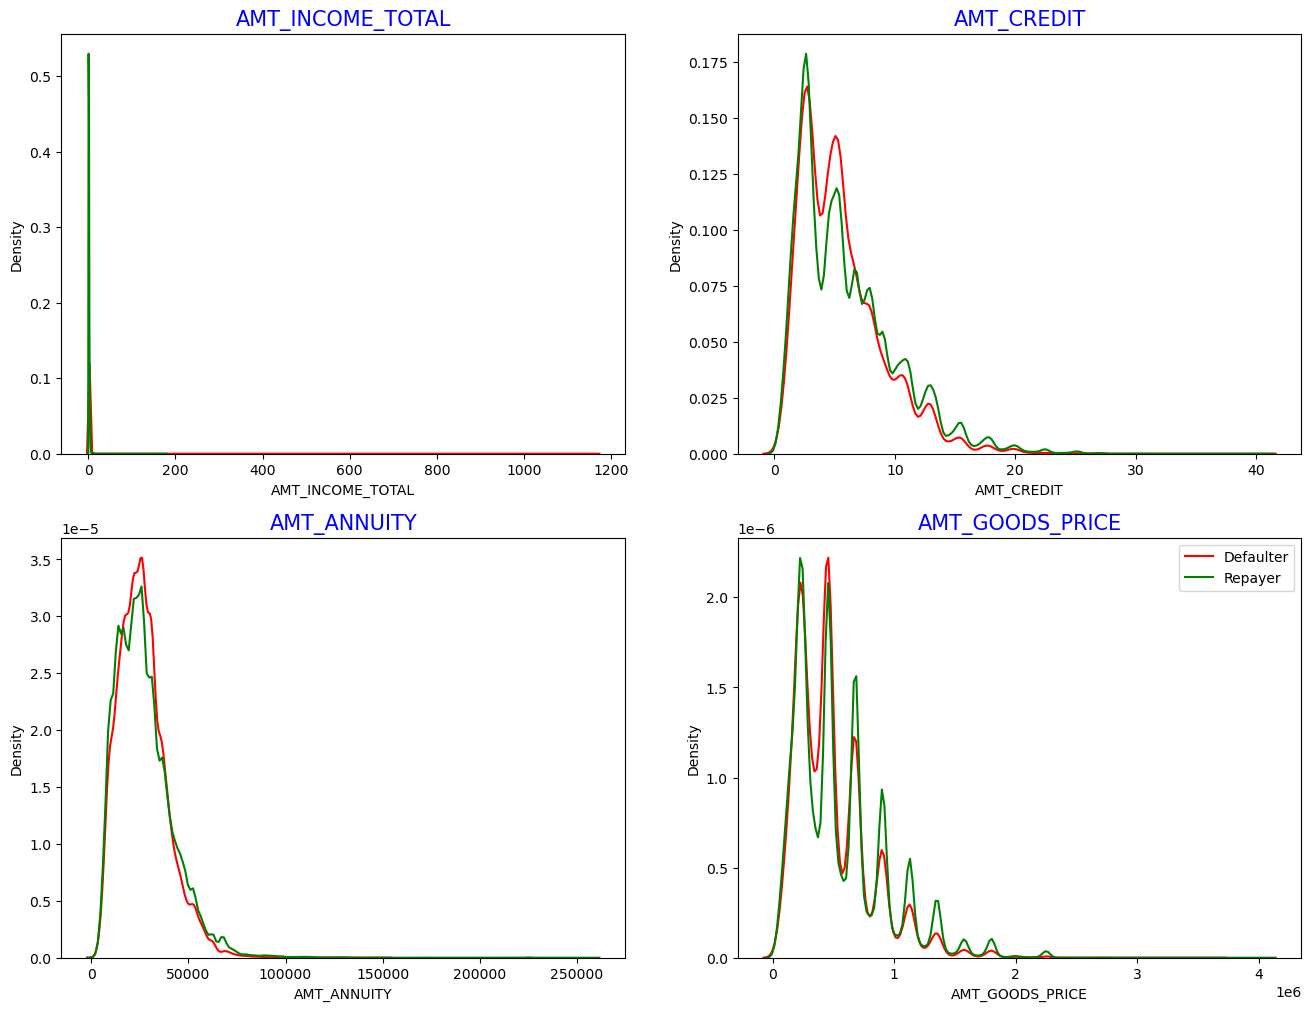

In [160]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> Most no of loans are given for goods price below 10 lakhs </li>
            <li> Most people pay annuity below 50000 for the credit loan</li>
            <li> Credit amount of the loan is mostly less then 10 lakhs</li>
            <li> The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision</li>
        </ul>
    </span>    
</div>

<h4>   
      <font color = green >
            <span style='font-family:Georgia'>
             Numerical Bivariate Analysis
            </span>   
        </font>    
</h4>

<Figure size 1500x600 with 0 Axes>

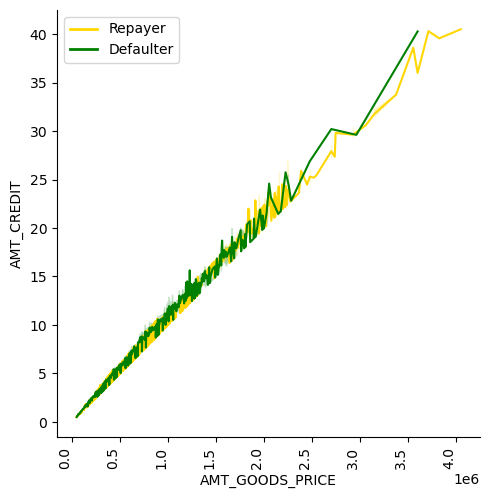

In [162]:
# Function for plotting repetitive rel plots in bivariate numerical analysis
def bivariate_rel(x, y, data, hue, kind, palette, legend, figsize):
    plt.figure(figsize=figsize)
    plot = sns.relplot(x=x, 
                       y=y, 
                       data=data, 
                       hue=hue,
                       kind=kind,
                       palette=palette,
                       legend=False)  # Disable automatic legend
    
    # Manually add legend with correct colors
    handles = [plt.Line2D([0], [0], color=palette[0], lw=2), 
               plt.Line2D([0], [0], color=palette[1], lw=2)]
    plt.legend(handles=handles, labels=['Repayer', 'Defaulter'], loc='best')

    plt.xticks(rotation=90, ha='right')
    plt.show()

# Plotting the relationship between AMT_GOODS_PRICE and AMT_CREDIT with loan repayment status
bivariate_rel('AMT_GOODS_PRICE', 'AMT_CREDIT', applicationDF, "TARGET", "line", ['gold', 'green'], False, (15, 6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>When the credit amount goes beyond 3M, there is an increase in defaulters.
    </span>    
</div>

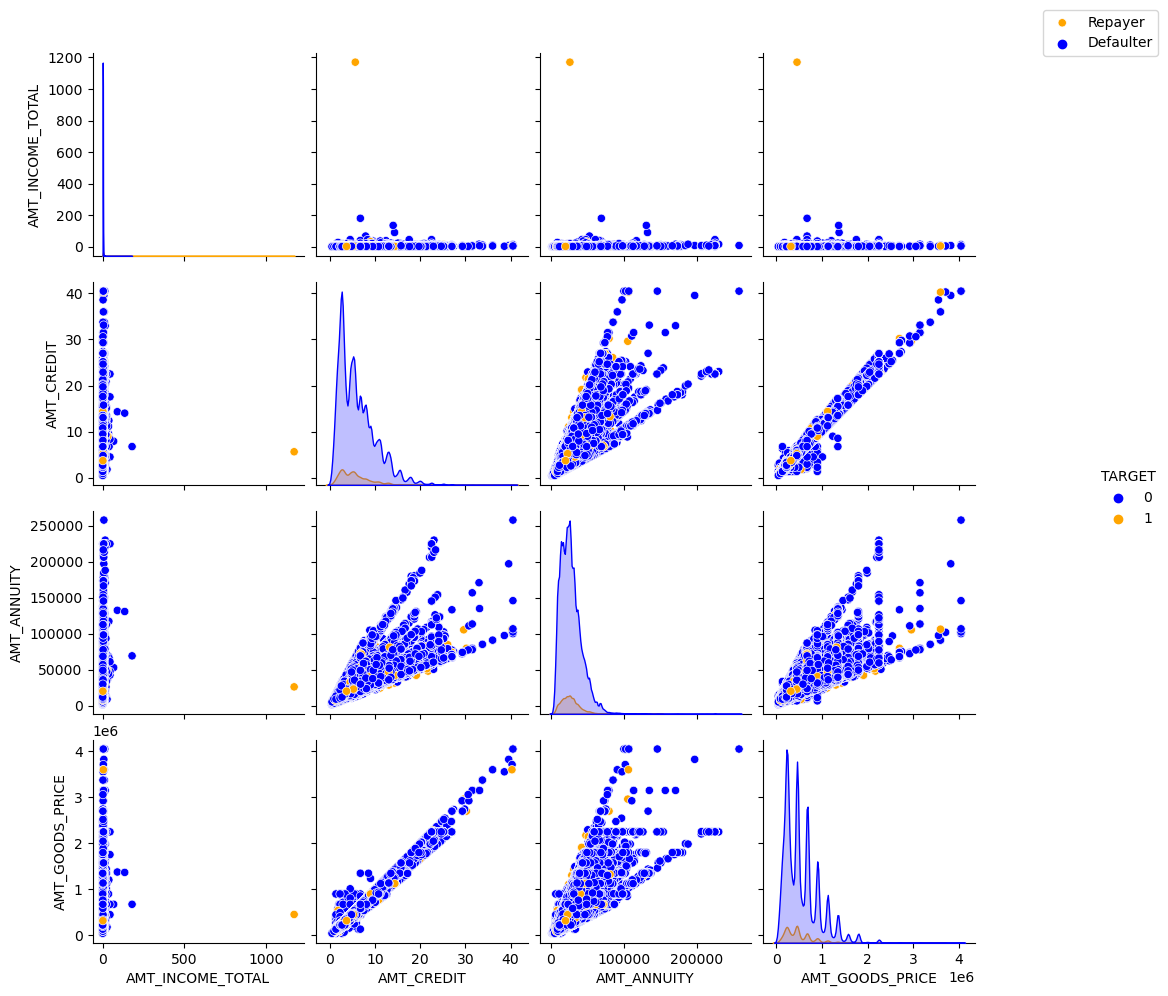

In [163]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
# Define the dataset for the pairplot
amount = applicationDF[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

# Create the pairplot
pair_plot = sns.pairplot(amount, hue="TARGET", palette=["blue", "orange"])

# Improve the legend
pair_plot.fig.subplots_adjust(top=0.95)  # Adjust the top to make room for the legend
pair_plot.fig.legend(labels=['Repayer', 'Defaulter'], loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters  </li>
            <li> AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line</li>
            <li> There are very less defaulters for AMT_CREDIT >3M</li>
            <li> Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section</li>
        </ul>
    </span>    
</div>

<a id="merge"></a>
<h2>   
      <font color = green >
            <span style='font-family:Georgia'>
            Merged Dataframes Analysis
            </span>   
        </font>    
</h2>

In [178]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                    2   
1              291      Core staff              2.0                    1   
2              291      Core staff              2.0                    1   
3              291      Core staff              2.0                    1   
4             2531        Laborers              1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           1                     MONDAY   
3                           1                     MONDAY   
4                           2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0  

In [179]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [180]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [181]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [182]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+00   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+00   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+00   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+00   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+00   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+03   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+00   2.701702e+04       5.277186e+05   
std    3.849173e+00   1.395116e+04       3.532465e+05   
min    4.500000e-01   1.615500e+03       4.050000e+04   
25%    2.700000e+00   1.682100e+04       2.385000e+05   
50%    5.084955e+00   2.492550e+04       4.500000e+05   
75%    8.079840e+00   3.454200e+04       6.795000e+05   
max    4.050000e+01   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.413701e+06  1.413701e+06   1.413701e+06   
mean                 2.074985e-02  1.632105e+04   7.266347e+04   
std                  1.334702e-02  4.344557e+03   1.433374e+05   
min                  2.900000e-04  7.489000e+03   0.000000e+00   
25%                  1.003200e-02  1.273900e+04   1.042000e+03   
50%                  1.885000e-02  1.604400e+04   2.401000e+03   
75%                  2.866300e-02  1.998000e+04   6.313000e+03   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count       1.413701e+06     1.413701e+06     1.413701e+06   
mean        5.003233e+03     3.034563e+03     2.150501e+00   
std         3.551051e+03     1.507376e+03     9.006787e-01   
min         0.000000e+00     0.000000e+00     1.000000e+00   
25%         2.001000e+03     1.783000e+03     2.000000e+00   
50%         4.508000e+03     3.330000e+03     2.000000e+00   
75%         7.510000e+03     4.319000e+03     3.000000e+00   
max         2.467200e+04     7.197000e+03     2.000000e+01   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             1.413701e+06                1.413701e+06   
mean              1.198433e+01                1.207327e-02   
std               3.232181e+00                1.092132e-01   
min               0.000000e+00                0.000000e+00   
25%               1.000000e+01                0.000000e+00   
50%               1.200000e+01                0.000000e+00   
75%               1.400000e+01                0.000000e+00   
max               2.300000e+01                1.000000e+00   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.544176e+00              1.540436e-01   
std                2.530715e+00              4.658973e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.480000e+02              3.400000e+01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.526303e+00              1.080426e-01   
std                2.508953e+00              3.790588e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.440000e+02              2.400000e+01   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CRED

In [183]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

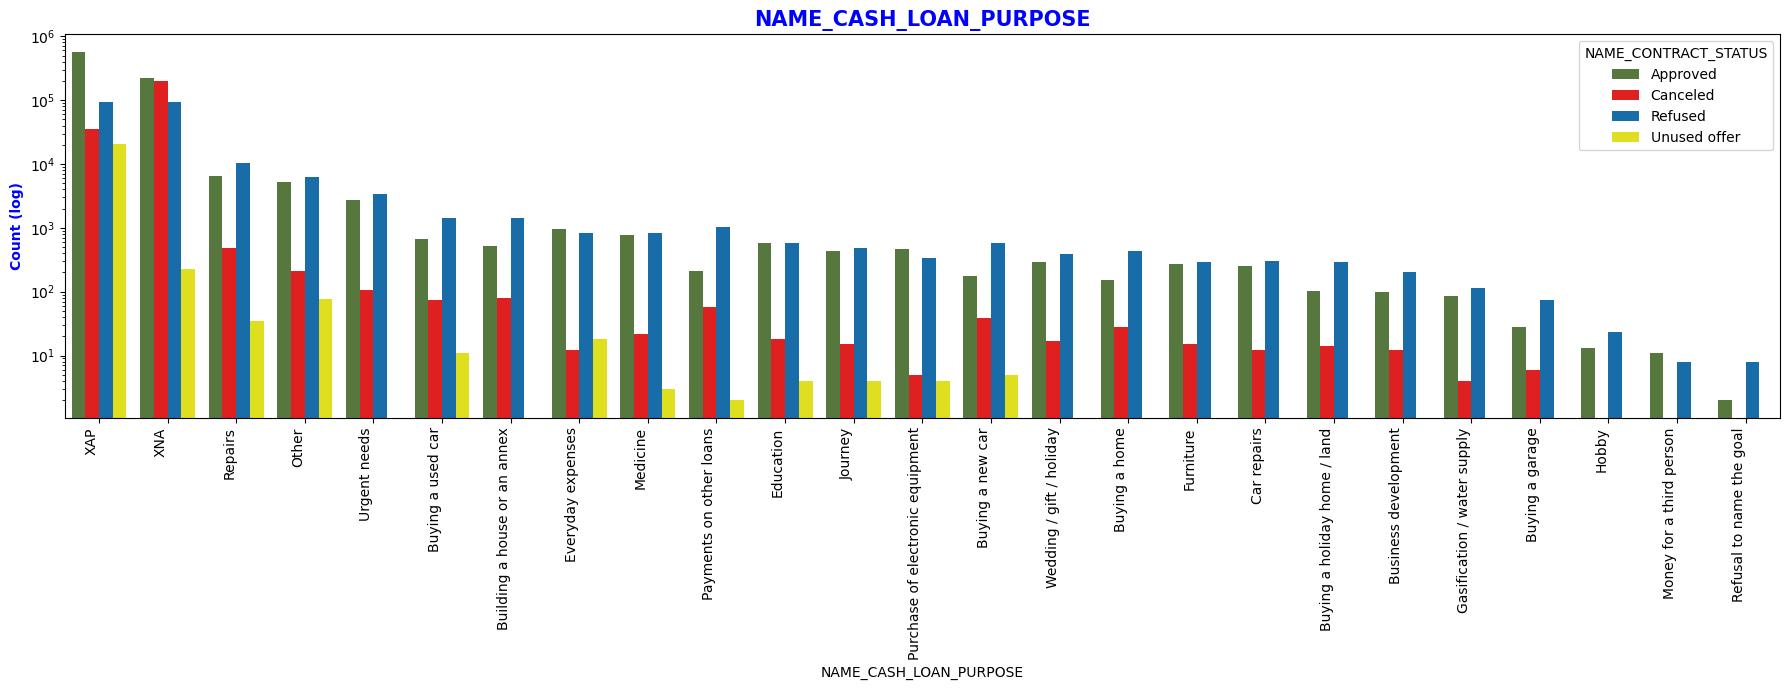

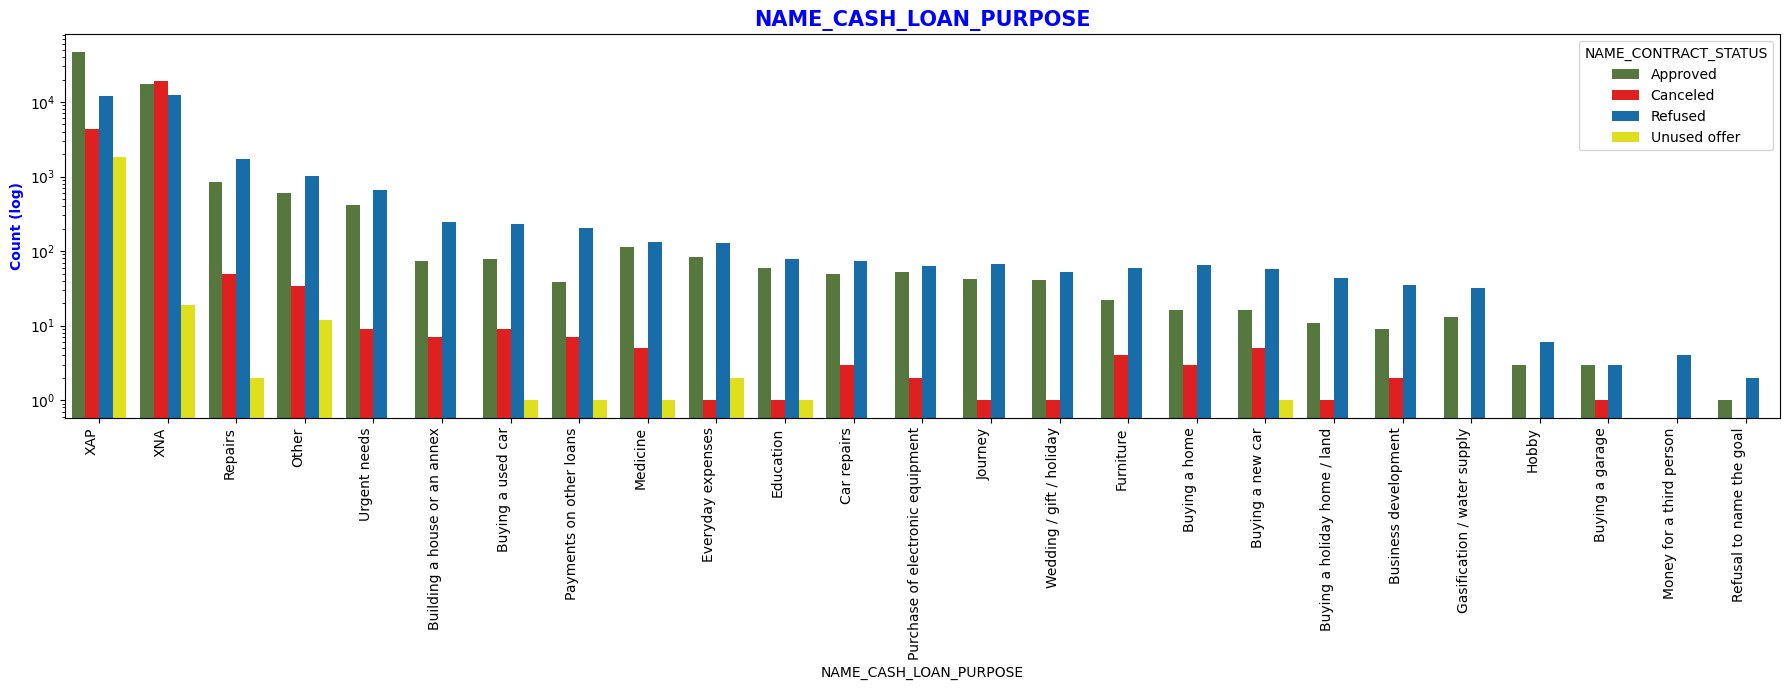

In [184]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> Loan purpose has high number of unknown values (XAP, XNA)</li>
            <li> Loan taken for the purpose of Repairs seems to have highest default rate</li>
            <li> A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.</li>
        </ul>
    </span>    
</div>

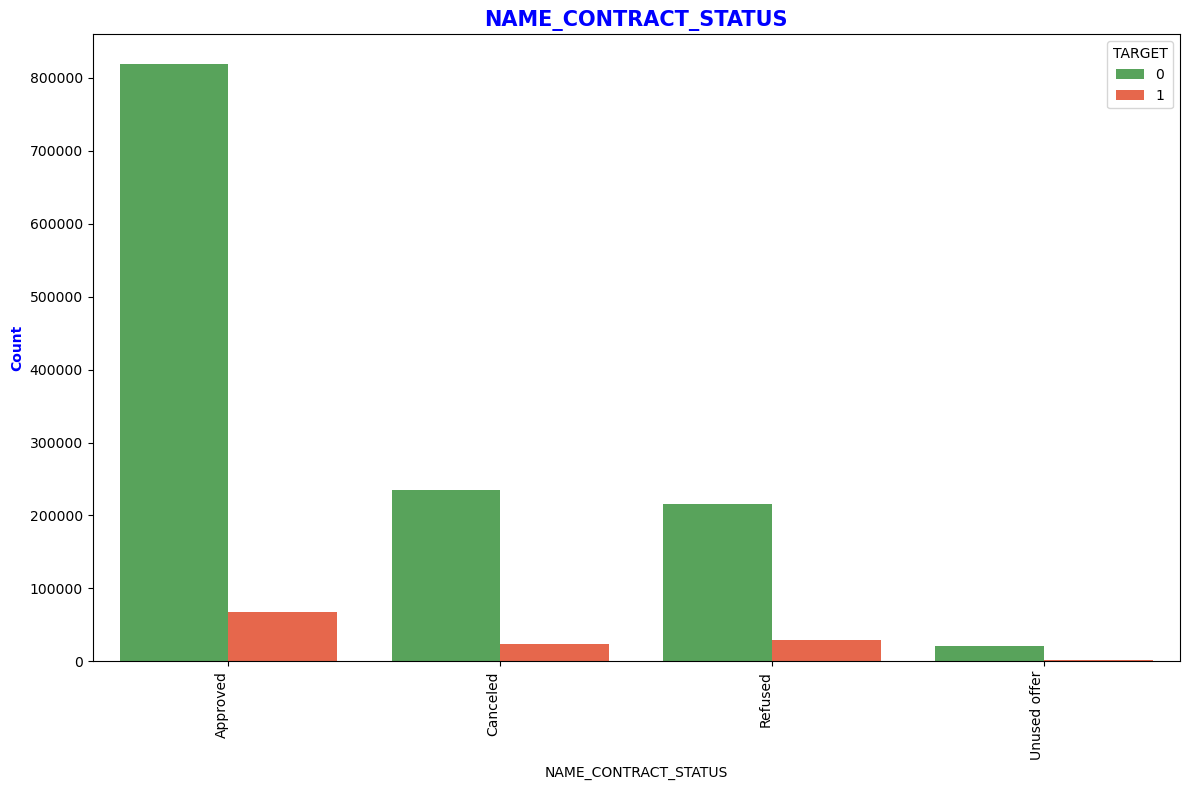

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [186]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss

univariate_merged("NAME_CONTRACT_STATUS", loan_process_df, "TARGET",
                  ["#4CAF50", "#FF5733", "#3498DB", "#F1C40F"],  # Approved, Canceled, Refused, Unused offer colors
                  False, (12, 8))

# Grouping and calculating counts and percentages for contract status by loan repayment status
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(), round(g.value_counts(normalize=True).mul(100), 2)], 
                axis=1, keys=('Counts', 'Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) + "%"  # Adding percentage symbol

# Display the results
print(df1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients</li>
            <li> 88% of the clients who have been previously refused a loan has payed back the loan in current case.</li>
            <li> Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer. </li>
        </ul>
    </span>    
</div>

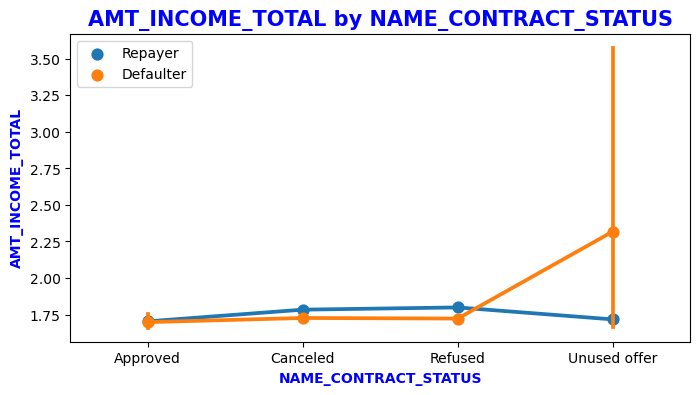

In [190]:
# plotting the relationship between income total and contact status

merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others
    </span>    
</div>

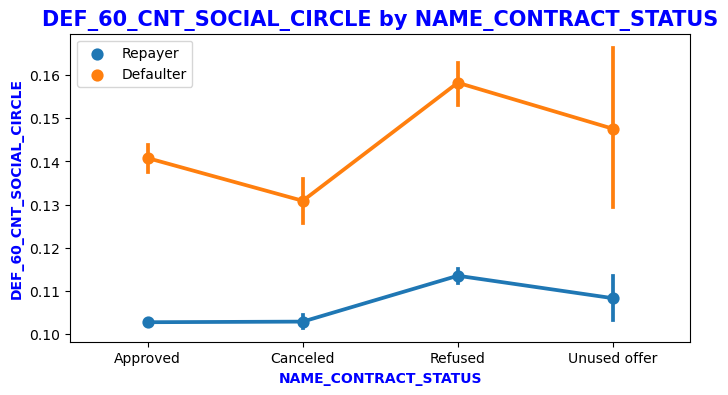

In [191]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br> 
        Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.
    </span>    
</div>

<a id="conclusion"></a>
<h2>   
    <font color="cyan">
        <span style="font-family:Georgia; font-size:28px;">
            Conclusions
        </span>   
    </font>    
</h2>


<p>
    <span style='font-family:Georgia'>
        After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:
    </span>
</p>

<div class="alert alert-block" style="background-color:#b0f8ff;">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Repayer: </b> 
        <ol>
            <li>NAME_EDUCATION_TYPE: Academic degree has less defaults. </li>
            <li>NAME_INCOME_TYPE: Student and Businessmen have no defaults.</li>
            <li>REGION_RATING_CLIENT: RATING 1 is safer.</li>
            <li>ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%</li>
            <li>DAYS_BIRTH: People above age of 50 have low probability of defaulting</li>
            <li>DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate</li>
            <li>AMT_INCOME_TOTAL: Applicant with Income more than 700,000 are less likely to default</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.</li>
            <li>CNT_CHILDREN: People with zero to two children tend to repay the loans.</li>
        </ol>
    </span>    
</div>


<div class="alert alert-block" style="background-color:#ffe4b5;">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Defaulter: </b> 
        <ol>
            <li>CODE_GENDER: Men are at relatively higher default rate</li>
            <li>NAME_FAMILY_STATUS: People who have civil marriage or who are single default a lot.</li>
            <li>NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education</li>
            <li>NAME_INCOME_TYPE: Clients who are either on Maternity leave or Unemployed default a lot.</li>
            <li>REGION_RATING_CLIENT: People who live in Rating 3 have the highest defaults.</li>
            <li>OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers, Waiters/barmen staff, Security staff, Laborers, and Cooking staff as the default rate is high.</li>
            <li>ORGANIZATION_TYPE: Organizations with the highest percentage of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%), and Restaurant (less than 12%). Self-employed people have a relatively high defaulting rate and thus should be avoided for loan approval or provided with loans at higher interest rates to mitigate the risk of defaulting.</li>
            <li>DAYS_BIRTH: Avoid young people who are in the age group of 20-40 as they have a higher probability of defaulting.</li>
            <li>DAYS_EMPLOYED: People who have less than 5 years of employment have a high default rate.</li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have children equal to or more than 9 default 100% and hence their applications should be rejected.</li>
            <li>AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.</li>
        </ol>
    </span>    
</div>


<div class="alert alert-block" style="background-color:#FFA500;">
    <span style='font-family:Georgia'>
        <b>Other suggestions: </b>
        <ul>
            <li>90% of the previously cancelled clients have actually repaid the loan. Recording the reason for cancellation might help the bank to determine and negotiate terms with these repaying customers in the future for increased business opportunities.</li>
            <li>88% of the clients who were refused loans by the bank earlier have now turned into repaying clients. Hence, documenting the reason for rejection could mitigate business loss, and these clients could be contacted for further loans.</li>
        </ul>
    </span>    
</div>
